### Benchmarking on PXD001819

#### The UPS data set contains 48 UPS1 proteins spiked into yeast proteome digest in nine different concentrations: 0.05, 0.125, 0.25, 0.5, 2.5, 5, 12.5, 25 and 50 fmol/ul. A LTQ Orbitrap Velos MS was used to analyze three technical replicates of each contration.

#### A fasta database of the yeast protein 6749 sequences merged with the spiked-in proteins sequence use used for searching. A false discoving rate of 0.01 was set as a threshold for peptide identifications and protein-level identifications

In [1]:
%load_ext rpy2.ipython

C:\Users\ChengXin\MyProgram\python\anaconda\pro\lib\site-packages\rpy2\robjects\packages.py:367: UserWarning: The symbol 'quartz' is not in this R namespace/package.
  "The symbol '%s' is not in this R namespace/package." % name


In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
%%R
data_folder = '../datasets/ups1_quantms/unique_peptide_target_only_psm0.01_prot0.01'
setwd(data_folder)

### Number of protein quantified

#### quantms quantified more proteins than DOI: 10.1093/bib/bbx054 and original result from doi: 10.1016/j.dib.2015.11.063. And most of proteins given in original paper is in our result.

In [10]:
quantms = pd.read_csv("./out_msstats.csv", sep=',', header=0)
quantms = quantms[-quantms['ProteinName'].str.contains("DECOY_")]
print(len(set(quantms['ProteinName'])))
quantms.head()


1190


ProteinName                 PeptideSequence  PrecursorCharge  \
0   sp|P04147|PABP_YEAST  .(Acetyl)ADITDKTAEQLENLNIQDDQK                3   
1  sp|Q01519|COX12_YEAST       .(Acetyl)ADQENSPLHTVGFDAR                2   
2  sp|Q01519|COX12_YEAST       .(Acetyl)ADQENSPLHTVGFDAR                2   
3  sp|Q01519|COX12_YEAST       .(Acetyl)ADQENSPLHTVGFDAR                2   
4  sp|Q01519|COX12_YEAST       .(Acetyl)ADQENSPLHTVGFDAR                2   

   FragmentIon  ProductCharge IsotopeLabelType        Condition  BioReplicate  \
0          NaN              0                L    UPS1|500 amol             8   
1          NaN              0                L  UPS1|12500 amol             1   
2          NaN              0                L   UPS1|2500 amol             4   
3          NaN              0                L   UPS1|2500 amol             4   
4          NaN              0                L    UPS1|250 amol             5   

   Run   Intensity               Reference  
0   23  34183840.0    UPS1_500amol_R2.mzML  
1    1  28307620.0  UPS1_12500amol_R1.mzML  
2   10  24355470.0   UPS1_2500amol_R1.mzML  
3   11  24121910.0   UPS1_2500amol_R2.mzML  
4   14  20445250.0    UPS1_250amol_R2.mzML

991
801
979
796
873
767
1090
854


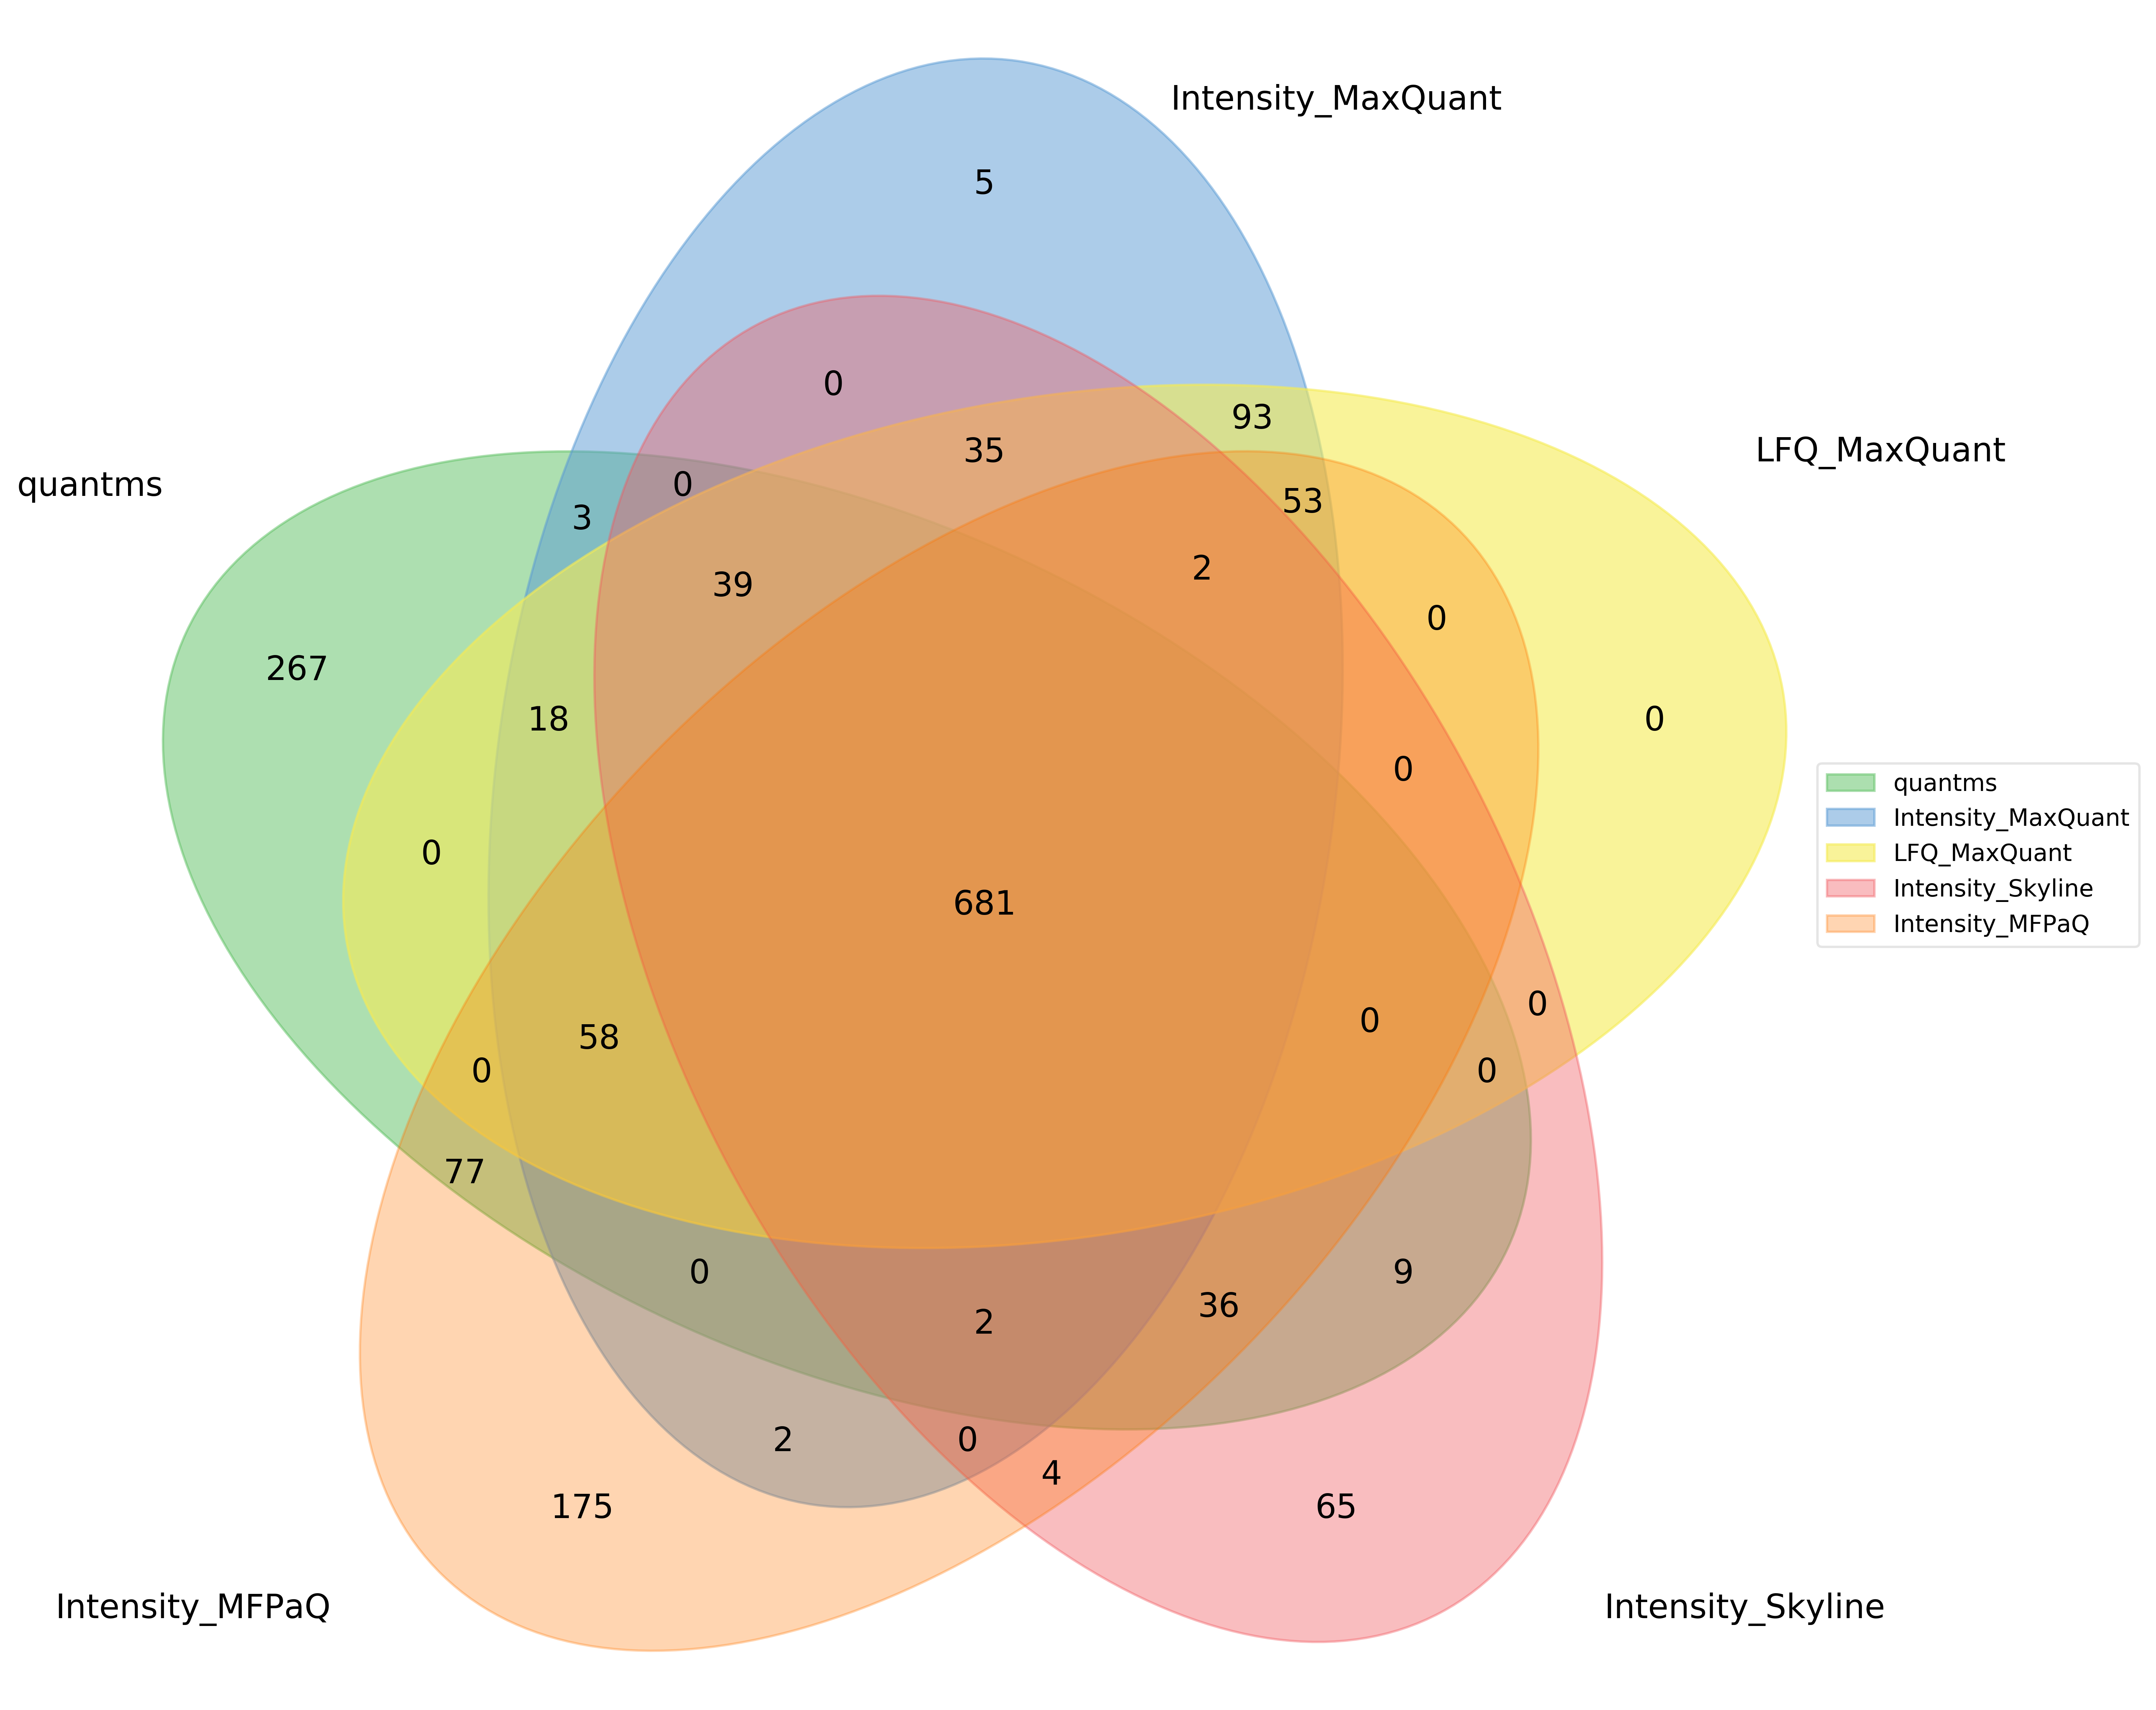

In [11]:
from pyvenn import venn
quantms['P1'] = quantms.apply(lambda x: ";".join(x.ProteinName.split("|")[1::2]), axis=1)

Intensity_MaxQuant = pd.read_excel("Supplementary Table 1.xlsx", sheet_name="Intensity MaxQuant (6)",header=0)
Intensity_MaxQuant = Intensity_MaxQuant[-Intensity_MaxQuant["Majority protein IDs"].str.contains("CON_")]
Intensity_MaxQuant['P1'] = Intensity_MaxQuant.apply(lambda x: x["Majority protein IDs"].split("|")[0].replace(">", ""), axis=1)
print(len(set(Intensity_MaxQuant['P1'])))
print(len(set(Intensity_MaxQuant['P1']).intersection(set(quantms['P1']))))

LFQ_MaxQuant = pd.read_excel("Supplementary Table 1.xlsx", sheet_name="LFQ MaxQuant (7)",header=0)
LFQ_MaxQuant = LFQ_MaxQuant[-LFQ_MaxQuant["Majority protein IDs"].str.contains("CON_")]
LFQ_MaxQuant['P1'] = LFQ_MaxQuant.apply(lambda x: x["Majority protein IDs"].split("|")[0].replace(">", ""), axis=1)
print(len(set(LFQ_MaxQuant['P1'])))
print(len(set(LFQ_MaxQuant['P1']).intersection(set(quantms['P1']))))

Intensity_Skyline = pd.read_excel("Supplementary Table 1.xlsx", sheet_name="Intensity Skyline (8)",header=0)
Intensity_Skyline = Intensity_Skyline[-Intensity_Skyline["Protein Name"].str.contains("CON_")]
Intensity_Skyline['P1'] = Intensity_Skyline.apply(lambda x: x["Protein Name"].replace("sp|", "").replace(",", ";"), axis=1)
print(len(set(Intensity_Skyline['P1'])))
print(len(set(Intensity_Skyline['P1']).intersection(set(quantms['P1']))))

Intensity_MFPaQ = pd.read_excel("Supplementary Table 1.xlsx", sheet_name="Intensity MFPaQ (5)",header=0)
Intensity_MFPaQ = Intensity_MFPaQ[-Intensity_MFPaQ["accession"].str.contains("CON_")]
Intensity_MFPaQ['P1'] = Intensity_MFPaQ.apply(lambda x: ";".join(x["Description"].replace("sp|", "").split("|")[0::2]), axis=1)

print(len(set(Intensity_MFPaQ['P1'])))
print(len(set(Intensity_MFPaQ['P1']).intersection(set(quantms['P1']))))

labels = venn.get_labels([set(quantms['P1']), set(Intensity_MaxQuant['P1']), set(LFQ_MaxQuant['P1']), set(Intensity_Skyline['P1']), set(Intensity_MFPaQ['P1'])], 
                         fill=['number'])
fig, ax = venn.venn5(labels, names=['quantms', 'Intensity_MaxQuant', 'LFQ_MaxQuant', 'Intensity_Skyline', 'Intensity_MFPaQ'], dpi=500)
plt.show()

#### compared with other results from 10.1021/acs.jproteome.1c00143. more proteins are quantified by quantms than maxquant.

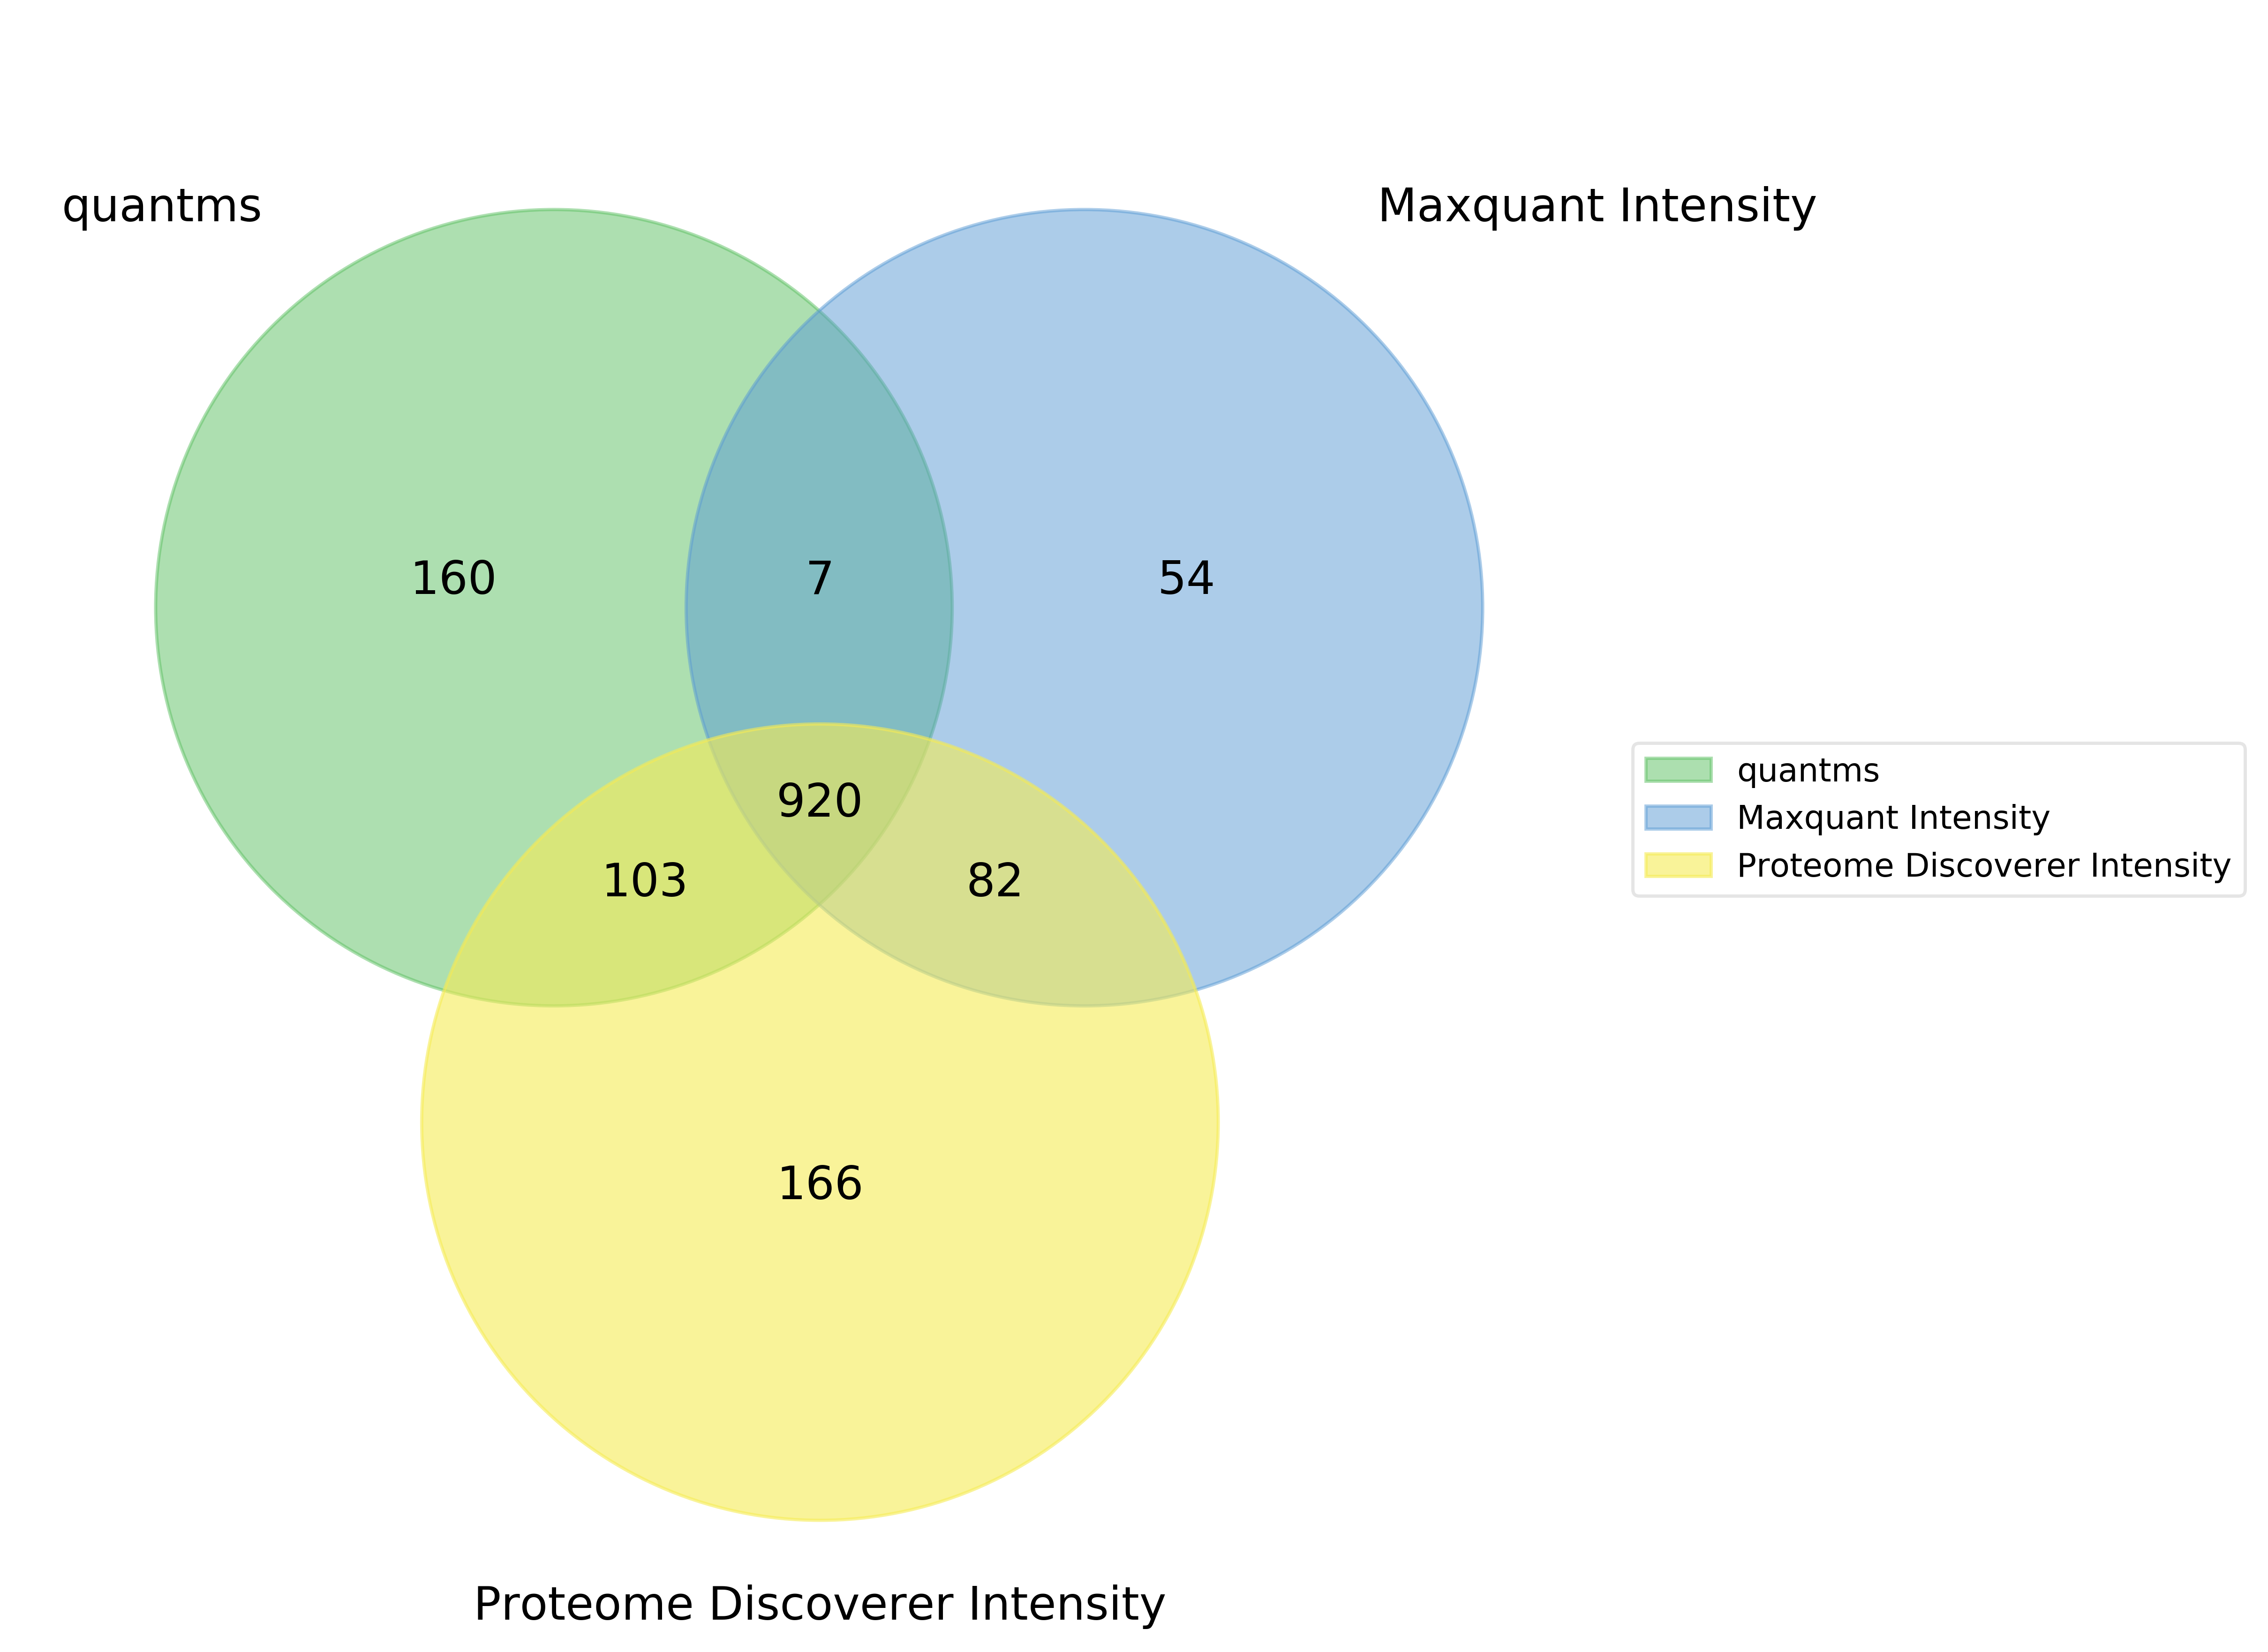

In [69]:
MQI = pd.read_excel("10_1021acs_jproteome_1c00143.xlsx", sheet_name="MQ-I", header=2)
PDI = pd.read_excel("10_1021acs_jproteome_1c00143.xlsx", sheet_name="PD-I", header=2)

labels = venn.get_labels([set(quantms['P1']), set(MQI['Protein']), set(PDI['Protein'])], 
                         fill=['number'])
fig, ax = venn.venn3(labels, names=['quantms', 'Maxquant Intensity', 'Proteome Discoverer Intensity'], dpi=500)
plt.show()

#### The total number of spiked-in proteins detected is 48 (48). All spiked-in proteins are quantified. It's better than other workflows such as Progenesis and Peaks from  DOI: 10.1093/bib/bbx054 (47 ups). and 10.1016/j.dib.2015.11.063. Overall reveals a trend, as the concentration decreases, the number of quantified spiked-in proteins will decrease.  

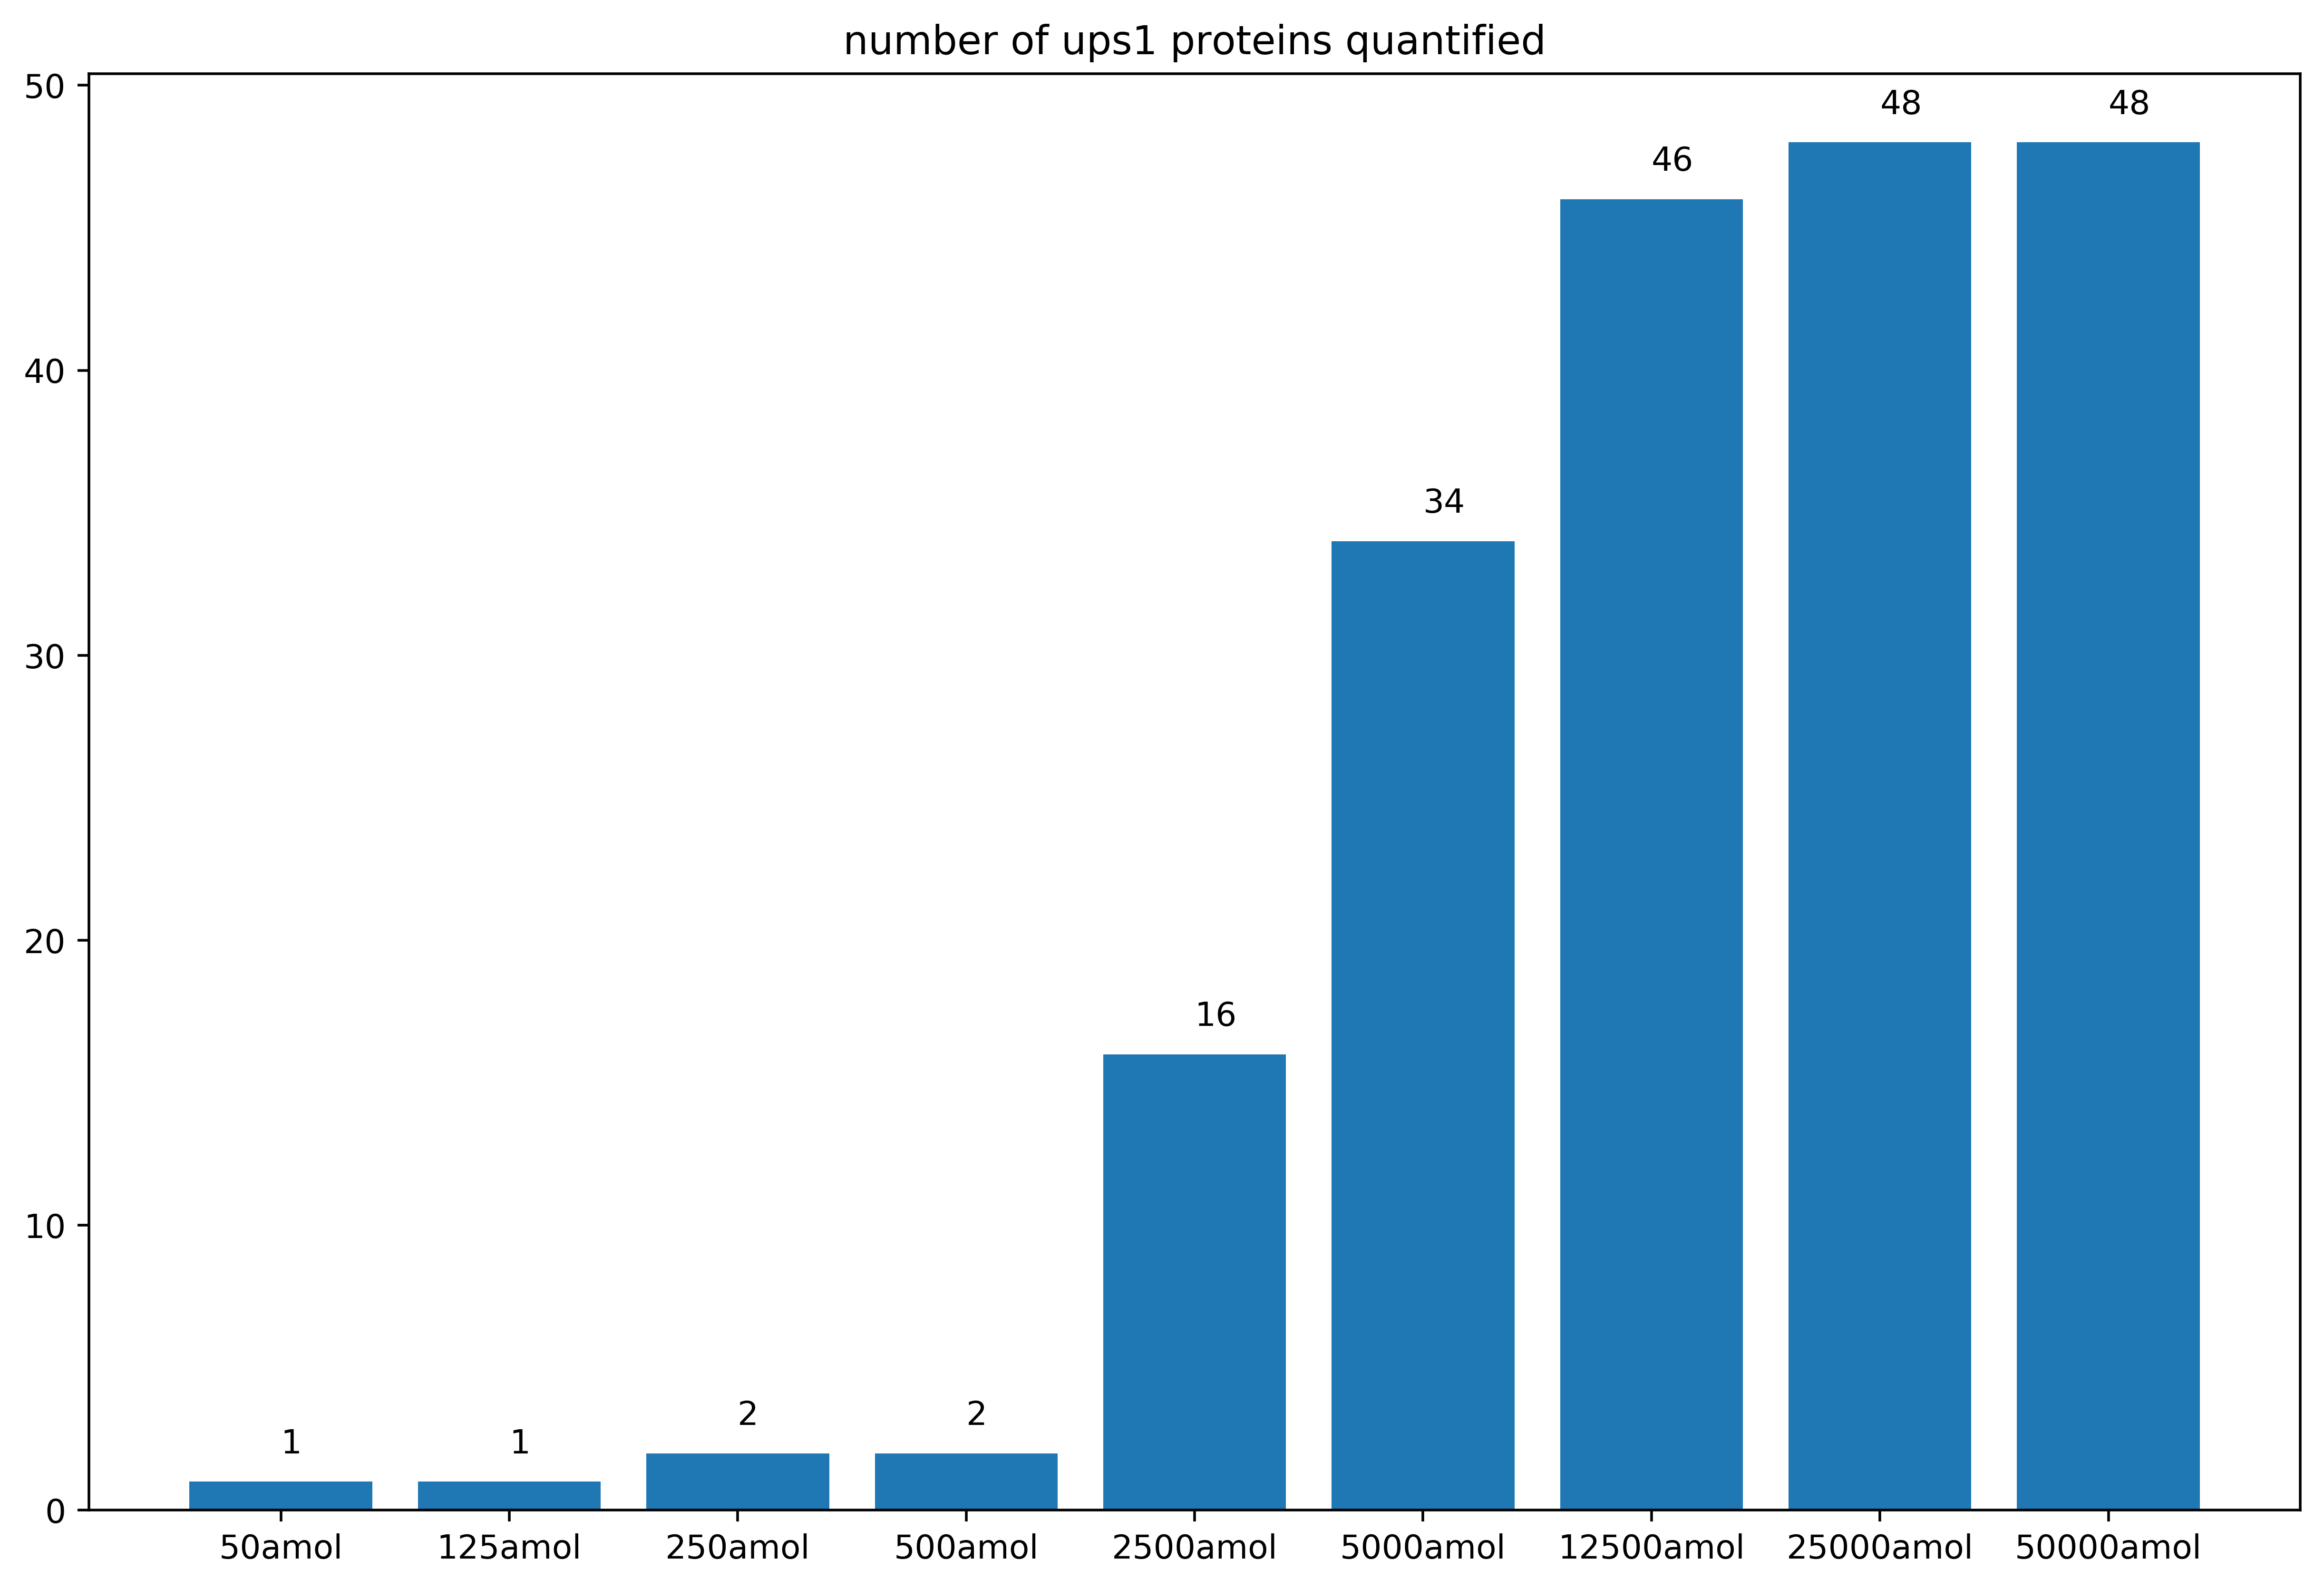

In [12]:
number_of_ups1 = dict()
for condition in np.unique(quantms['Condition']):
    number_of_ups1[condition.replace("UPS1|", "").replace(" ", "")] = len((set(quantms.loc[(quantms['ProteinName'].str.contains("ups")) & (quantms['Condition'] == condition), 'ProteinName'])))

plt.figure(figsize=(12,8), dpi=500)
num = []
label = []
for key, value in sorted(number_of_ups1.items(), key=lambda item: int(item[0].replace("amol",""))):
    num.append(value)
    label.append(key)
for x, y in zip(range(9), num):
    plt.text(x, y+1, y)

plt.bar(range(9), num)
plt.title("number of ups1 proteins quantified")
plt.xticks(range(9),label)
plt.show()

### Assess missing value

#### A common and pervasive problem in MS data are missing values. When using peptide peaking intensities for relative quantification, missing values are intensity values that are not recorded for a peptide in a sample/replicates. Missing values can occur because of multiple reasons and are mainly divided into two main categories : abundance-depdendent missing values (eg. the concentration of the peptide is below the detection limit of the instrument) or values missing completely at random (eg. the identification of the peptide is incorrect)¶

#### Proportion of missing values in the detected spiked-in proteins is 6.7% . It's lower than MaxQuant(35.2%), Proteios(19.9%), PEAKS(21.4%) and another openms workflow (13.0%) from  DOI: 10.1093/bib/bbx054

In [13]:
missing_values_ups = 0
total = 0
for condition in np.unique(quantms['Condition']):
    quant_condition = quantms.loc[(quantms['ProteinName'].str.contains("UPS")) & (quantms['Condition'] == condition)]
    for protein in np.unique(quant_condition['ProteinName']):
        msruns = np.unique(quant_condition[quant_condition['ProteinName'] == protein]['Run'])
        total += 3
        if len(msruns) < 3:
            missing_values_ups += (3 - len(msruns))
            
print(missing_values_ups / total)

0.06734006734006734


#### Proportion of missing value in background proteins is 11.5%. It's lower than another workflow(20.0%).

In [14]:
missing_values_background = 0
total = 0
for condition in np.unique(quantms['Condition']):
    quant_condition = quantms.loc[(-quantms['ProteinName'].str.contains("UPS")) & (quantms['Condition'] == condition)]
    for protein in np.unique(quant_condition['ProteinName']):
        total += 3
        msruns = np.unique(quant_condition[quant_condition['ProteinName'] == protein]['Run'])
        if len(msruns) < 3:
            missing_values_background += (3 - len(msruns))
            
print(missing_values_background / total)

0.11473516527279969


### Reproducibility between Analytical Replicate before msstats process

#### Proteomics analysis has many possiable sources of variability, although these variations impacts the identification of peptides and for replicates, proteomic identifications are far from completely random.

#### Testing each concentration in triplicate allowed us to calculate a coefficient of variation (CV) of peptide/protein intensities to asses signal extraction reproducibility annd workflow consistency, those are very important for proteomics analysis!

#### Calculate the metrics before msstats process to assess quantms. Of course is it necessary to calculate this metric after msstats processing?. Ignoring missing proteins at the same time. Missing values will be considered seperately.

#### CV = protein mean intensity within replicates / corresponding std. For the peptide intensity, abundances are summed over all charge states. Protein abundance will be computed from peptide abundances based on median????.CV is calculated separately in background proteins and UPS1 proteins.

#### Here, only the first five concentrations are compared because only a small part of the protein was quantified at low concentrations. comparing other six results from doi: 10.1021/acs.jproteome.1c00143 including MQ analysis returned a (raw) intensity value (MQ-I),  normalized LFQ intensity value (MQ-L) ,Proteome Discoverer analysis provided four different quantitative values for each quantified protein: intensity (PD-I), normalized intensity (PD-nI), area (PD-A), and normalized area (PD-nA). quantms has the smallest cv in 2500 amol condition.

[30.846440668403694, 22.175396480920796, 11.125309287563214, 11.745276505914244, 6.061162302638675]
[24.422325262624526, 18.94353665267302, 12.086668360585488, 13.610863295491619, 9.937527531063388]
[20.786709636284996, 6.548419211981178, 4.760508498240406, 12.83459647039443, 2.786649105577931]
[20.373168567106838, 6.485365756787559, 4.700465084667569, 5.761377671043802, 2.576547282702561]
[22.447337691092763, 8.059806639894052, 5.497889949506995, 17.80957329571576, 3.691842810130503]
[22.10876240362598, 7.807604365731942, 5.5267243808670905, 6.94600180603442, 2.9909941295617726]
[19.968276943901294, 22.513382901684302, 11.656722356187712, 16.652480819473173, 5.355387673711153]


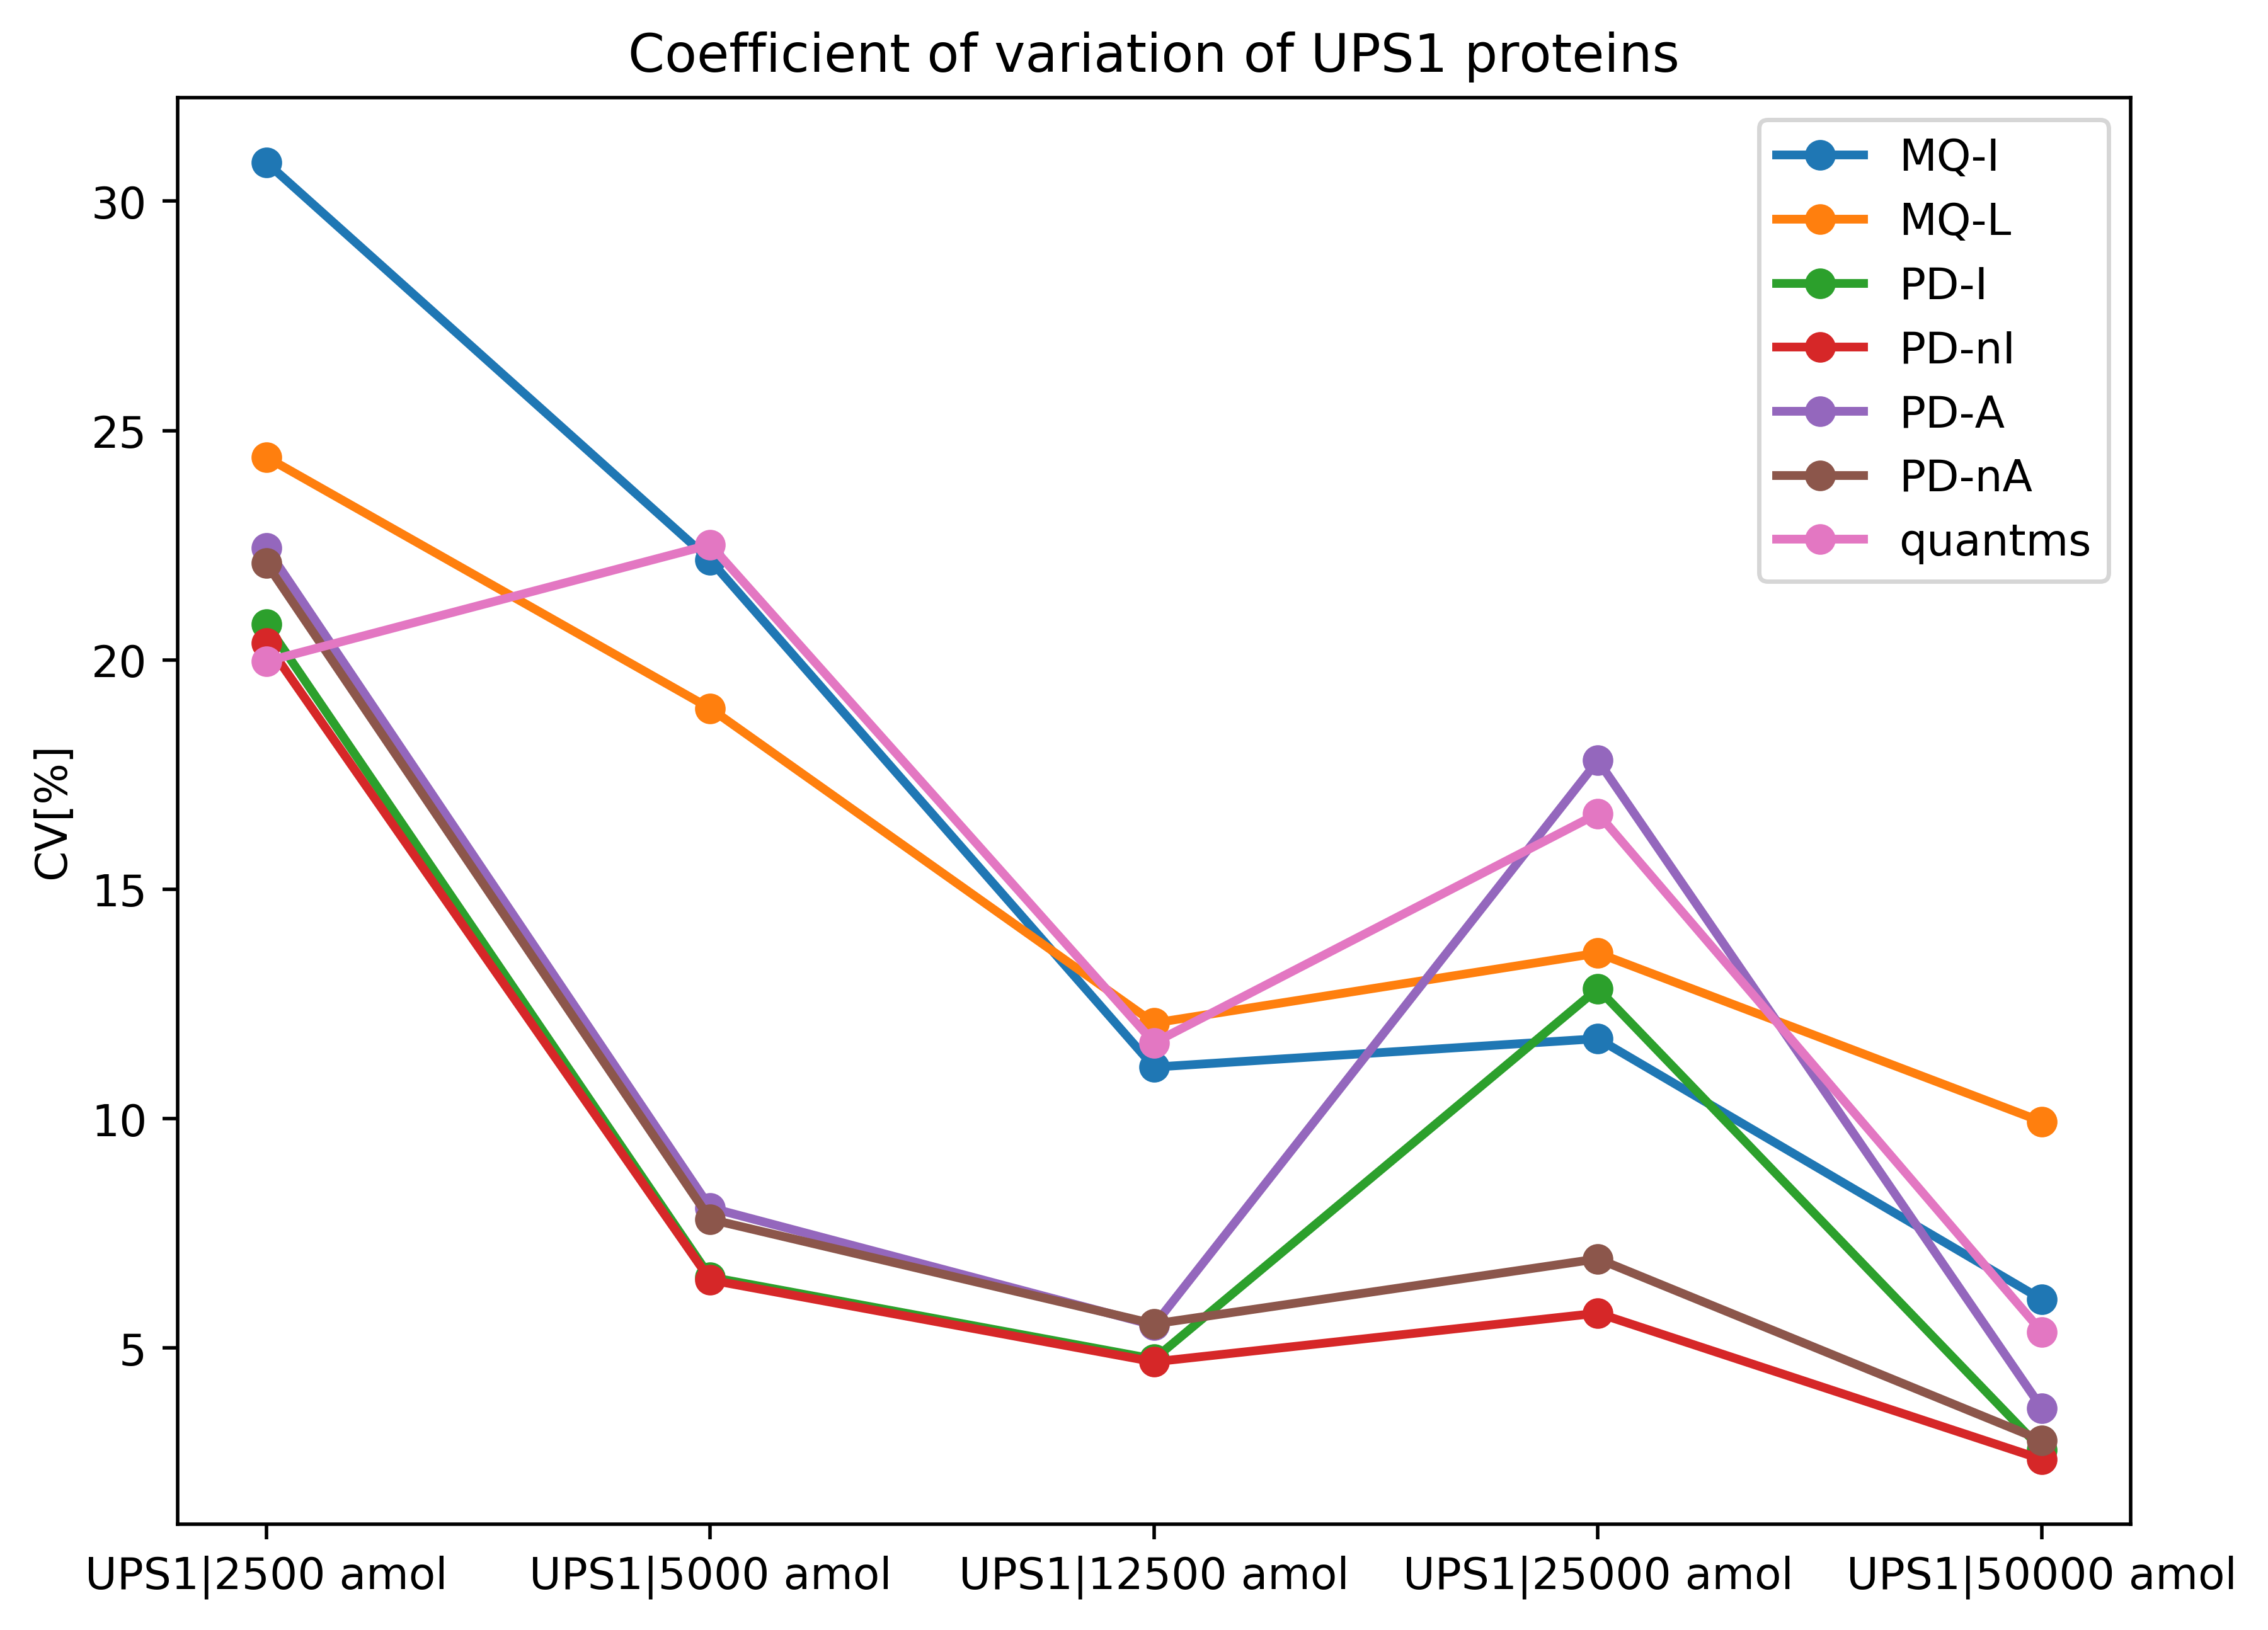

In [26]:
# original result  doi: 10.1021/acs.jproteome.1c00143
cvs = []
plt.figure(figsize=(8,6), dpi=500)
data = pd.read_excel("10_1021acs_jproteome_1c00143.xlsx", sheet_name="MQ-I", header=2)
cvs.append(np.mean(data[data['Spike/Background'] == "Spike"]['CV_P5']) * 100)
cvs.append(np.mean(data[data['Spike/Background'] == "Spike"]['CV_P4']) * 100)
cvs.append(np.mean(data[data['Spike/Background'] == "Spike"]['CV_P3']) * 100)
cvs.append(np.mean(data[data['Spike/Background'] == "Spike"]['CV_P2']) * 100)
cvs.append(np.mean(data[data['Spike/Background'] == "Spike"]['CV_P1']) * 100)
plt.plot(range(5), cvs, linewidth=2, marker='o', markersize=6)
print(cvs)
# for i in range(5):
#     plt.text(i+0.05, cvs[i] + 0.05, round(cvs[i], 2))

cvs = []
data = pd.read_excel("10_1021acs_jproteome_1c00143.xlsx", sheet_name="MQ-L", header=2)
cvs.append(np.mean(data[data['Spike/Background'] == "Spike"]['CV_P5']) * 100)
cvs.append(np.mean(data[data['Spike/Background'] == "Spike"]['CV_P4']) * 100)
cvs.append(np.mean(data[data['Spike/Background'] == "Spike"]['CV_P3']) * 100)
cvs.append(np.mean(data[data['Spike/Background'] == "Spike"]['CV_P2']) * 100)
cvs.append(np.mean(data[data['Spike/Background'] == "Spike"]['CV_P1']) * 100)
plt.plot(range(5), cvs, linewidth=2, marker='o', markersize=6)
print(cvs)
# for i in range(5):
#     plt.text(i+0.05, cvs[i] + 0.05, round(cvs[i], 2))

cvs = []
data = pd.read_excel("10_1021acs_jproteome_1c00143.xlsx", sheet_name="PD-I", header=2)
cvs.append(np.mean(data[data['Spike/Background'] == "Spike"]['CV_P5']) * 100)
cvs.append(np.mean(data[data['Spike/Background'] == "Spike"]['CV_P4']) * 100)
cvs.append(np.mean(data[data['Spike/Background'] == "Spike"]['CV_P3']) * 100)
cvs.append(np.mean(data[data['Spike/Background'] == "Spike"]['CV_P2']) * 100)
cvs.append(np.mean(data[data['Spike/Background'] == "Spike"]['CV_P1']) * 100)
plt.plot(range(5), cvs, linewidth=2, marker='o', markersize=6)
print(cvs)
# for i in range(5):
#     plt.text(i+0.05, cvs[i] + 0.05, round(cvs[i], 2))

cvs = []
data = pd.read_excel("10_1021acs_jproteome_1c00143.xlsx", sheet_name="PD-nI", header=2)
cvs.append(np.mean(data[data['Spike/Background'] == "Spike"]['CV_P5']) * 100)
cvs.append(np.mean(data[data['Spike/Background'] == "Spike"]['CV_P4']) * 100)
cvs.append(np.mean(data[data['Spike/Background'] == "Spike"]['CV_P3']) * 100)
cvs.append(np.mean(data[data['Spike/Background'] == "Spike"]['CV_P2']) * 100)
cvs.append(np.mean(data[data['Spike/Background'] == "Spike"]['CV_P1']) * 100)
plt.plot(range(5), cvs, linewidth=2, marker='o', markersize=6)
print(cvs)
# for i in range(5):
#     plt.text(i+0.05, cvs[i] + 0.05, round(cvs[i], 2))

cvs = []
data = pd.read_excel("10_1021acs_jproteome_1c00143.xlsx", sheet_name="PD-A", header=2)
cvs.append(np.mean(data[data['Spike/Background'] == "Spike"]['CV_P5']) * 100)
cvs.append(np.mean(data[data['Spike/Background'] == "Spike"]['CV_P4']) * 100)
cvs.append(np.mean(data[data['Spike/Background'] == "Spike"]['CV_P3']) * 100)
cvs.append(np.mean(data[data['Spike/Background'] == "Spike"]['CV_P2']) * 100)
cvs.append(np.mean(data[data['Spike/Background'] == "Spike"]['CV_P1']) * 100)
plt.plot(range(5), cvs, linewidth=2, marker='o', markersize=6)
print(cvs)
# for i in range(5):
#     plt.text(i+0.05, cvs[i] + 0.05, round(cvs[i], 2))

cvs = []
data = pd.read_excel("10_1021acs_jproteome_1c00143.xlsx", sheet_name="PD-nA", header=2)
cvs.append(np.mean(data[data['Spike/Background'] == "Spike"]['CV_P5']) * 100)
cvs.append(np.mean(data[data['Spike/Background'] == "Spike"]['CV_P4']) * 100)
cvs.append(np.mean(data[data['Spike/Background'] == "Spike"]['CV_P3']) * 100)
cvs.append(np.mean(data[data['Spike/Background'] == "Spike"]['CV_P2']) * 100)
cvs.append(np.mean(data[data['Spike/Background'] == "Spike"]['CV_P1']) * 100)
plt.plot(range(5), cvs, linewidth=2, marker='o', markersize=6)
print(cvs)
# for i in range(5):
#     plt.text(i+0.05, cvs[i] + 0.05, round(cvs[i], 2))



n_data = pd.DataFrame(None,columns = ['ProteinName','TechRep1','TechRep2', 'TechRep3', 'Condition', "CV[%]"])
for condition in np.unique(quantms['Condition']):
    if len(quantms.loc[(quantms['ProteinName'].str.contains("ups")) & (quantms['Condition'] == condition)]) < 3:
        continue
    quant_condition = quantms.loc[(quantms['ProteinName'].str.contains("ups")) & (quantms['Condition'] == condition)]
    for protein in np.unique(quant_condition['ProteinName']):
        msruns = np.unique(quant_condition[quant_condition['ProteinName'] == protein]['Run'])
        
        # proteins were filtered out if not quantified in all replicates
        if len(msruns) < 3:
            continue
            
        tech_intensity = []    
        # summarized protein intensity in a technical replicate
        for run in msruns:
            tech_intensity.append(np.sum(quant_condition[(quant_condition['ProteinName'] == protein) & ((quant_condition['Run'] == run))]['Intensity']))
        mean = np.mean(tech_intensity)
        std = np.std(tech_intensity)
        n_data = n_data.append({'ProteinName':protein,'TechRep1':tech_intensity[0], 
                       'TechRep2': tech_intensity[1], 'TechRep3': tech_intensity[2], 
                       'Condition': condition, "CV[%]": 100 * (std / mean)}, ignore_index=True)

# calcualte average CV in UPS1 proteins without missing value
cvs = []
xticks = []

conditions = np.unique(n_data["Condition"])
conditions = sorted(conditions, key= lambda x: int(x.replace("UPS1|","").replace(" amol", "")))
for condition in conditions:
    cvs.append(np.mean(n_data[n_data['Condition'] == condition]["CV[%]"]))
    xticks.append(condition)

print(cvs)    
plt.plot(range(5), cvs, linewidth=2, marker='o', markersize=6)
plt.xticks(range(5), xticks)
# for i in range(5):
#     plt.text(i - 0.05, cvs[i] + 0.05, round(cvs[i], 2))
plt.ylabel('CV[%]')
plt.title('Coefficient of variation of UPS1 proteins')
plt.legend(['MQ-I', 'MQ-L', 'PD-I', 'PD-nI', 'PD-A', 'PD-nA','quantms'])
plt.show()


#### Calcaulate CV of backgroud Proteins. Compared with MQ-I because it is the raw intensity returned by MQ. Overall, the cv is low although mean CV is not as good as MQ-I. And quantms have smaller outliers for CV

In [31]:
data = pd.read_excel("10_1021acs_jproteome_1c00143.xlsx", sheet_name="MQ-I", header=2)
print(len(set(data['Protein'])))

1063


MQ-I: 
UPS1|50 amol: 16.244204
UPS1|125 amol: 13.892722
UPS1|250 amol: 14.578074
UPS1|500 amol: 14.178719
UPS1|2500 amol: 15.228156
UPS1|5000 amol: 13.982164
UPS1|12500 amol: 14.087323
UPS1|25000 amol: 19.028129
UPS1|50000 amol: 13.932340
quantms: 
UPS1|125 amol mean cv: 15.293679
UPS1|12500 amol mean cv: 15.195264
UPS1|250 amol mean cv: 14.836396
UPS1|2500 amol mean cv: 17.889894
UPS1|25000 amol mean cv: 23.865384
UPS1|50 amol mean cv: 18.578527
UPS1|500 amol mean cv: 14.120962
UPS1|5000 amol mean cv: 16.981338
UPS1|50000 amol mean cv: 14.676407


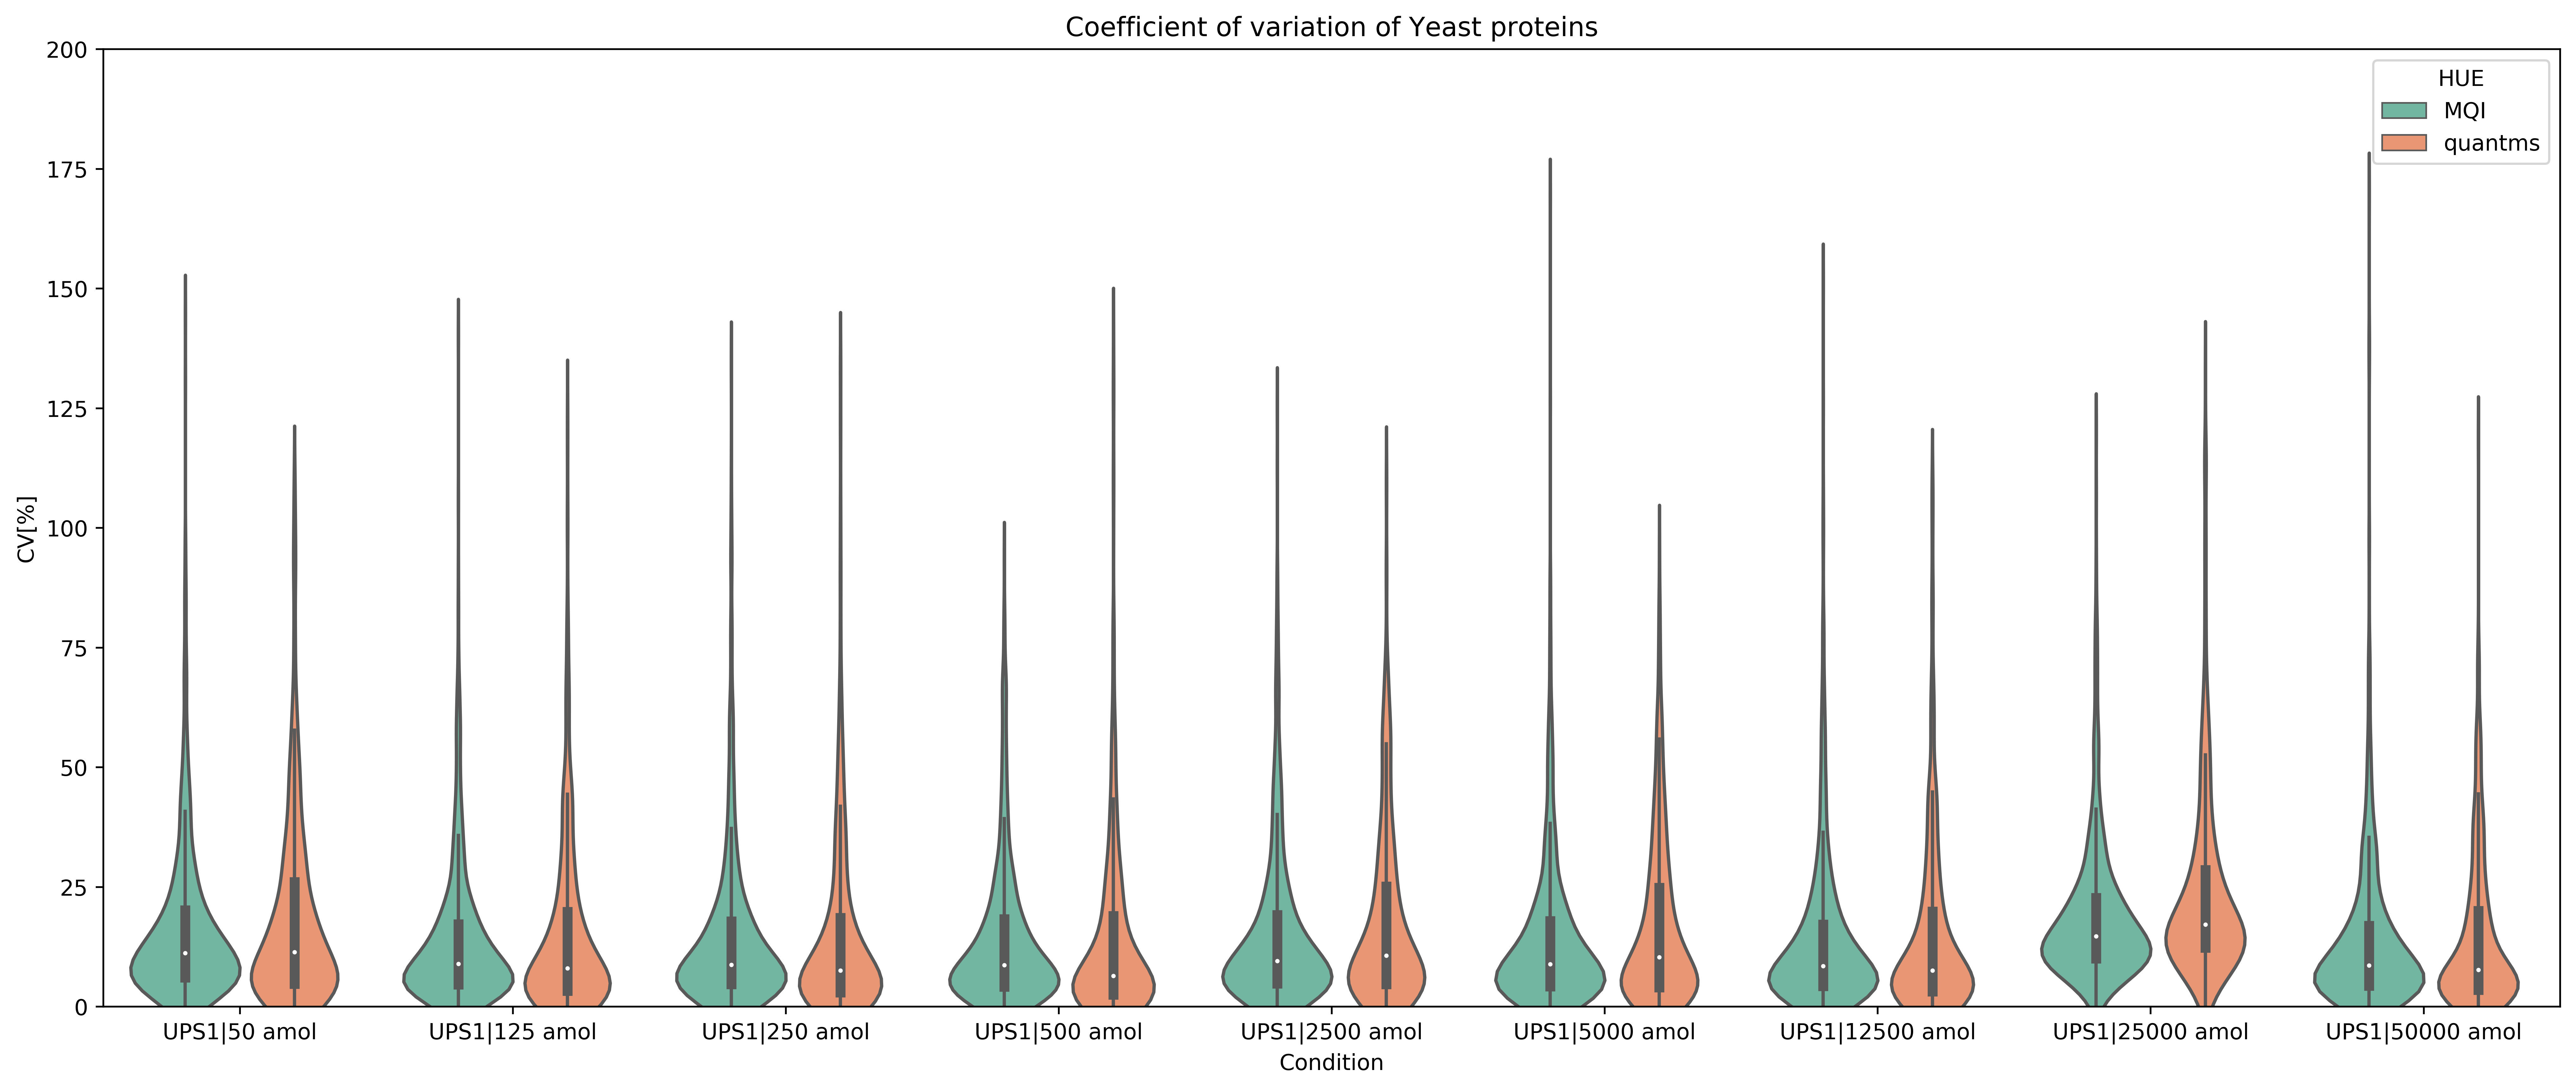

In [49]:
data = pd.read_excel("10_1021acs_jproteome_1c00143.xlsx", sheet_name="MQ-I", header=2)
MQI = pd.DataFrame(None,columns = ['Protein', 'Condition', "CV[%]", "HUE"])
P9 = data[data['Spike/Background'] == "Background"][['Protein','CV_P9']]
P9 = P9.dropna(how="any")
P9 = P9.rename(columns={'CV_P9': "CV[%]"})
P9['Condition'] = "UPS1|50 amol"
P9["CV[%]"] = P9["CV[%]"] * 100
P9['HUE'] = "MQI"
print("MQ-I: ")
print("UPS1|50 amol: %f" %(np.mean(P9['CV[%]'])))

P8 = data[data['Spike/Background'] == "Background"][['Protein','CV_P8']]
P8 = P8.dropna(how="any")
P8['Condition'] = "UPS1|125 amol"
P8 = P8.rename(columns={'CV_P8': "CV[%]"})
P8["CV[%]"] = P8["CV[%]"] * 100
P8['HUE'] = "MQI"
print("UPS1|125 amol: %f" %(np.mean(P8['CV[%]'])))

P7 = data[data['Spike/Background'] == "Background"][['Protein','CV_P7']]
P7 = P7.dropna(how="any")
P7['Condition'] = "UPS1|250 amol"
P7 = P7.rename(columns={'CV_P7': "CV[%]"})
P7["CV[%]"] = P7["CV[%]"] * 100
P7['HUE'] = "MQI"
print("UPS1|250 amol: %f" %(np.mean(P7['CV[%]'])))

P6 = data[data['Spike/Background'] == "Background"][['Protein','CV_P6']]
P6 = P6.dropna(how="any")
P6['Condition'] = "UPS1|500 amol"
P6 = P6.rename(columns={'CV_P6': "CV[%]"})
P6["CV[%]"] = P6["CV[%]"] * 100
P6['HUE'] = "MQI"
print("UPS1|500 amol: %f" %(np.mean(P6['CV[%]'])))

P5 = data[data['Spike/Background'] == "Background"][['Protein','CV_P5']]
P5 = P5.dropna(how="any")
P5['Condition'] = "UPS1|2500 amol"
P5 = P5.rename(columns={'CV_P5': "CV[%]"})
P5["CV[%]"] = P5["CV[%]"] * 100
P5['HUE'] = "MQI"
print("UPS1|2500 amol: %f" %(np.mean(P5['CV[%]'])))

P4 = data[data['Spike/Background'] == "Background"][['Protein','CV_P4']]
P4 = P4.dropna(how="any")
P4['Condition'] = "UPS1|5000 amol"
P4 = P4.rename(columns={'CV_P4': "CV[%]"})
P4["CV[%]"] = P4["CV[%]"] * 100
P4['HUE'] = "MQI"
print("UPS1|5000 amol: %f" %(np.mean(P4['CV[%]'])))

P3 = data[data['Spike/Background'] == "Background"][['Protein','CV_P3']]
P3 = P3.dropna(how="any")
P3['Condition'] = "UPS1|12500 amol"
P3 = P3.rename(columns={'CV_P3': "CV[%]"})
P3["CV[%]"] = P3["CV[%]"] * 100
P3['HUE'] = "MQI"
print("UPS1|12500 amol: %f" %(np.mean(P3['CV[%]'])))

P2 = data[data['Spike/Background'] == "Background"][['Protein','CV_P2']]
P2 = P2.dropna(how="any")
P2['Condition'] = "UPS1|25000 amol"
P2 = P2.rename(columns={'CV_P2': "CV[%]"})
P2["CV[%]"] = P2["CV[%]"] * 100
P2['HUE'] = "MQI"
print("UPS1|25000 amol: %f" %(np.mean(P2['CV[%]'])))

P1 = data[data['Spike/Background'] == "Background"][['Protein','CV_P1']]
P1 = P1.dropna(how="any")
P1['Condition'] = "UPS1|50000 amol"
P1 = P1.rename(columns={'CV_P1': "CV[%]"})
P1["CV[%]"] = P1["CV[%]"] * 100
P1['HUE'] = "MQI"
print("UPS1|50000 amol: %f" %(np.mean(P1['CV[%]'])))

MQI = MQI.append([P9, P8, P7, P6, P5, P4, P3, P2, P1])


print("quantms: ")
b_data = pd.DataFrame(None,columns = ['Protein', 'Condition', "CV[%]", "HUE"])
quantms_background = quantms[-quantms['ProteinName'].str.contains("ups")]
for condition in np.unique(quantms_background['Condition']):
    quantms_background_condition = quantms_background.loc[quantms_background['Condition'] == condition]
    cvs = []
    for protein in np.unique(quantms_background_condition['ProteinName']):
        msruns = np.unique(quantms_background_condition[quantms_background_condition['ProteinName'] == protein]['Run'])
        
        # proteins were filtered out if not quantified in all replicates
        if len(msruns) < 3:
            continue
            
        tech_intensity = []    
        # summarized protein intensity in a technical replicate
        for run in msruns:
            tech_intensity.append(np.sum(quantms_background_condition[(quantms_background_condition['ProteinName'] == protein) & ((quantms_background_condition['Run'] == run))]['Intensity']))
        mean = np.mean(tech_intensity)
        std = np.std(tech_intensity)
        cvs.append(100 * (std / mean))
        b_data = b_data.append({'Protein':protein,
                       'Condition': condition, "CV[%]": 100 * (std / mean), "HUE": "quantms"}, ignore_index=True)
    print(condition + " mean cv: %f" %(np.mean(cvs)))

vio_data = MQI.append(b_data)
plt.figure(figsize=(20,8), dpi=500)
plt.ylim(0, 200)
plt.title("Coefficient of variation of Yeast proteins")
sns.violinplot(x = "Condition", y="CV[%]", data=vio_data, scale= "count", palette="Set2", hue="HUE",
               order=['UPS1|50 amol', 'UPS1|125 amol', 'UPS1|250 amol', 'UPS1|500 amol', 'UPS1|2500 amol', 'UPS1|5000 amol',
                     'UPS1|12500 amol', 'UPS1|25000 amol', 'UPS1|50000 amol'])

plt.show()

### QCplots and Calculate FC

In [50]:
%%R -w 800 -h 600

library('MSstats', warn.conflicts = F, quietly = T, verbose = F)
#library(reticulate)

protein_expression = 'protein_expression.csv'

raw.om <- read.csv('out_msstats.csv', header = TRUE, sep = ',')
raw.om <- raw.om[!grepl("DECOY", raw.om$ProteinName),]

# If run dataProcess() occuring an error message, please change "summaryMethod = 'TMP'" to "summaryMethod = 'linear'"
quantms.proposed <- MSstats::dataProcess(raw = raw.om,
                                           normalization = 'equalizeMedians',
                                           summaryMethod = 'TMP',
                                           censoredInt = "NA",
                                           MBimpute = TRUE)

# Write the expression protein log values into the expression csv 
head(quantms.proposed$ProteinLevelData)
Protein.Expression <- quantms.proposed$ProteinLevelData[, c('Protein', 'LogIntensities', 'GROUP')]
head(Protein.Expression)
write.csv(Protein.Expression, file=protein_expression, row.names=FALSE)

INFO  [2021-12-12 19:02:52] ** Features with one or two measurements across runs are removed.
INFO  [2021-12-12 19:02:52] ** Fractionation handled.
INFO  [2021-12-12 19:02:53] ** Updated quantification data to make balanced design. Missing values are marked by NA
INFO  [2021-12-12 19:02:53] ** Log2 intensities under cutoff = 20.522  were considered as censored missing values.
INFO  [2021-12-12 19:02:53] ** Log2 intensities = NA were considered as censored missing values.
INFO  [2021-12-12 19:02:53] ** Use all features that the dataset originally has.
INFO  [2021-12-12 19:02:53] 
 # proteins: 1069
 # peptides per protein: 1-93
 # features per peptide: 1-1
INFO  [2021-12-12 19:02:53] Some proteins have only one feature: 
 P01133ups|EGF_HUMAN_UPS,
 sp|A5Z2X5|YP010_YEAST,
 sp|O13516|RS9A_YEAST,
 sp|O13563|RPN13_YEAST,
 sp|O13585|YP089_YEAST ...
INFO  [2021-12-12 19:02:54] 
                    UPS1|125 amol UPS1|12500 amol UPS1|250 amol UPS1|2500 amol UPS1|25000 amol UPS1|50 amol UPS1|500 a

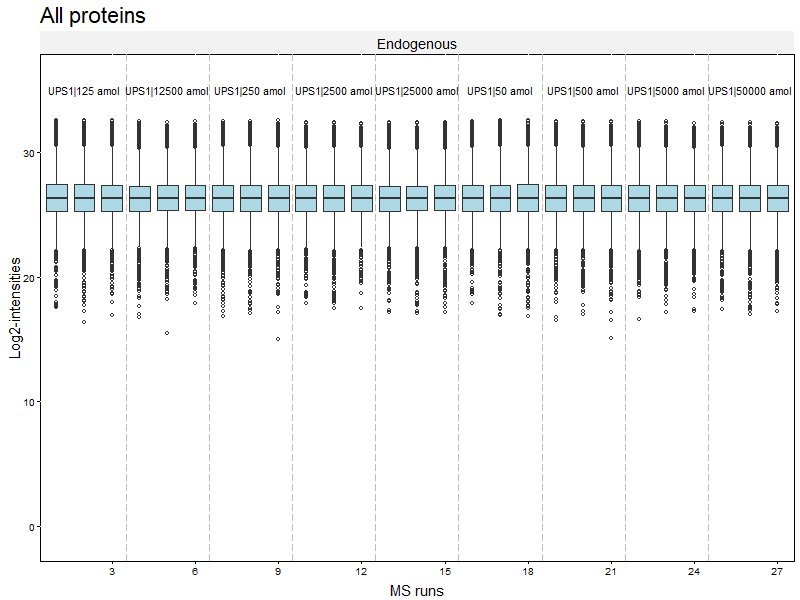

In [51]:
%%R -w 800 -h 600
tmp <- levels(quantms.proposed$ProcessedData$PROTEIN)
selector <- append('allonly', tmp, 1)
dataProcessPlots(data = quantms.proposed, type="QCPlot",which.Protein=selector,width=10, height=5, address=FALSE)

[1] "sp|Q02197|NAA35_YEAST"
  |============================================================          |  86%


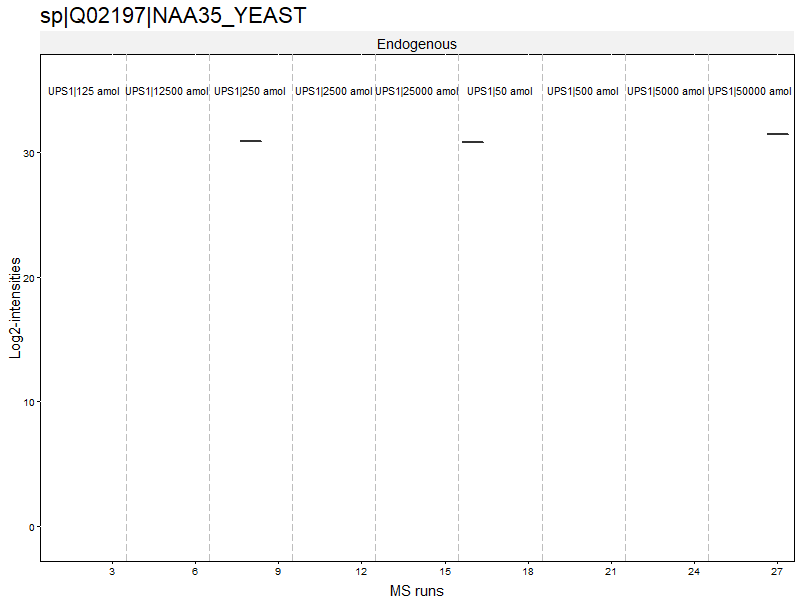

In [52]:
%%R -w 800 -h 600

Protein.Expression2 <- Protein.Expression[order(Protein.Expression$LogIntensities,decreasing = TRUE),]
protein_accession <- as.character(Protein.Expression2$Protein[1])
print(protein_accession)
tmp <- levels(quantms.proposed$ProcessedData$PROTEIN)
selector <- append(protein_accession, tmp, 1)
dataProcessPlots(data = quantms.proposed, type="QCPlot",which.Protein=selector,width=10, height=5, address=FALSE)


#### background proteins: Intensity shoud be identical in all MSrun

  |======================================================================| 100%
  |======================================================================| 100%


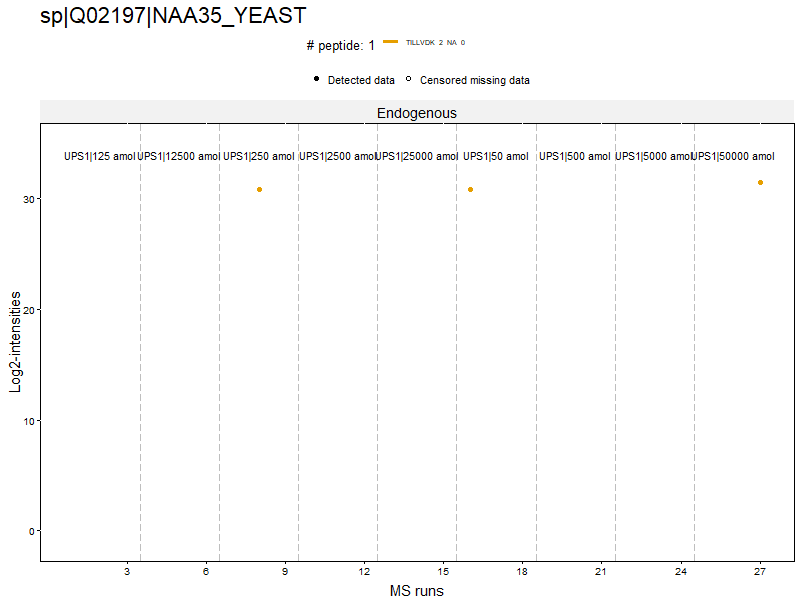

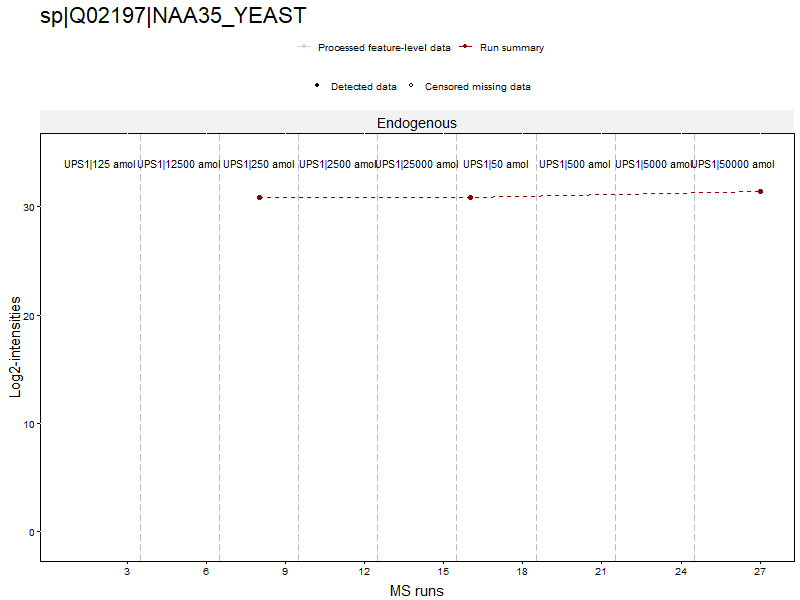

In [53]:
%%R -w 800 -h 600

tmp <- levels(quantms.proposed$ProcessedData$PROTEIN)
selector <- append(protein_accession, tmp, 1)
dataProcessPlots(data = quantms.proposed, type="ProfilePlot",which.Protein=selector,width=10, height=5, address=FALSE)

  |=                                                                     |   2%


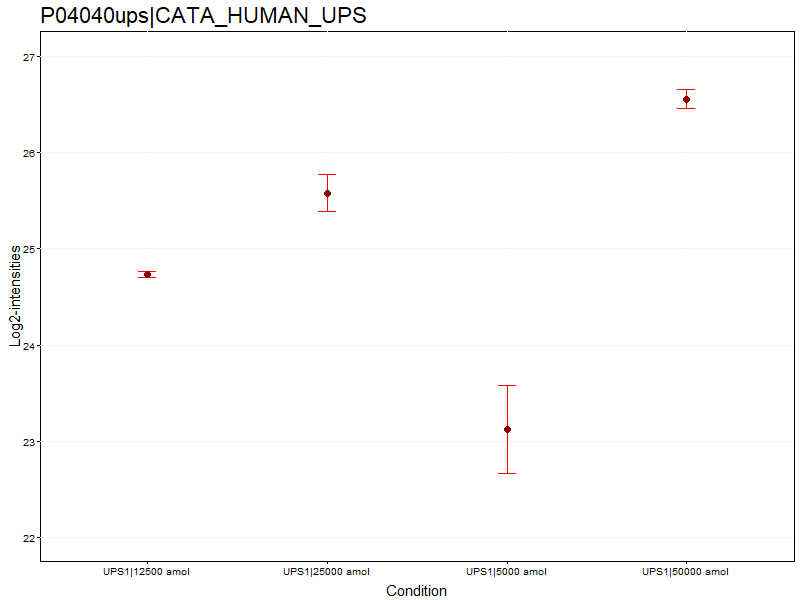

In [54]:
%%R -w 800 -h 600

tmp <- levels(quantms.proposed$ProcessedData$PROTEIN)
selector <- append("P04040ups|CATA_HUMAN_UPS", tmp, 1)
dataProcessPlots(data = quantms.proposed, type="ConditionPlot",which.Protein=selector,width=10, height=5, address=FALSE)

In [55]:
%%R

ac_groups = levels(quantms.proposed$FeatureLevelData$GROUP)
groups = levels(quantms.proposed$ProteinLevelData$GROUP)
print(groups)
comparison_matrix = c(0,0,0,0,0,0,-1,0,0,0,0,0,0,-1,0,0,0,0,0,-1,0,0,0,0,-1,0,0,0,-1,0,0,-1,0,-1,0,1,
                     0,-1,0,0,0,0,0,0,-1,0,0,0,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
                     0,0,0,0,0,-1,0,0,0,0,0,0,-1,0,0,0,0,0,-1,0,0,0,0,-1,0,0,0,-1,0,0,-1,0,0,1,1,0,
                     0,0,0,-1,0,0,0,0,0,0,-1,0,0,0,0,0,-1,0,0,0,0,-1,0,0,0,0,1,1,1,1,0,0,0,0,0,0,
                     -1,0,0,0,0,0,0,0,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
                     0,0,0,0,0,0,0,-1,0,0,0,0,0,0,-1,0,0,0,0,0,-1,0,0,0,0,-1,0,0,0,-1,0,0,-1,0,-1,-1,
                     0,0,0,0,-1,0,0,0,0,0,0,-1,0,0,0,0,0,-1,0,0,0,0,-1,0,0,0,-1,0,0,0,1,1,1,0,0,0,
                     0,0,-1,0,0,0,0,0,0,-1,0,0,0,0,0,-1,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,
                     1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0)

print(length(comparison_matrix))
comparison <- matrix(comparison_matrix, nrow=36)
colnames(comparison) <- groups[order(as.numeric(groups))]
row.names(comparison) <- c("50vs25", "50vs12.5", "50vs5","50vs2.5","50vs0.5", "50vs0.25", "50vs0.125","50vs0.05", 
                          "25vs12.5", "25vs5", "25vs2.5", "25vs0.5", "25vs0.25", "25vs0.125", "25vs0.05",
                          "12.5vs5", "12.5vs2.5", "12.5vs0.5", "12.5vs0.25", "12.5vs0.125", "12.5vs0.05",
                          "5vs2.5", "5vs0.5", "5vs0.25", "5vs0.125", "5vs0.05",
                          "2.5vs0.5", "2.5vs0.25", "2.5vs0.125", "2.5vs0.05",
                          "0.5vs0.25", "0.5vs0.125", "0.5vs0.05",
                          "0.25vs0.125", "0.25vs0.05",
                           "0.125vs0.05")

[1] "UPS1|125 amol"   "UPS1|12500 amol" "UPS1|250 amol"   "UPS1|2500 amol" 
[5] "UPS1|25000 amol" "UPS1|50 amol"    "UPS1|500 amol"   "UPS1|5000 amol" 
[9] "UPS1|50000 amol"
[1] 324


In [56]:
%%R

ResultComparison <- groupComparison(contrast.matrix=comparison, data=quantms.proposed)
head(ResultComparison$ComparisonResult)
write.csv(ResultComparison$ComparisonResult, 'comparison_res.csv', row.names=FALSE,col.names=TRUE,sep=",")

INFO  [2021-12-12 19:03:18]  == Start to test and get inference in whole plot ...
  |======================================================================| 100%
INFO  [2021-12-12 19:03:32]  == Comparisons for all proteins are done.


### Measure Accuracy of protein quantification

#### Since the aim of most proteomcis studies is to analyze differential protein expression by revealing significant quantitative differences between complex proteomes, protein quantificaiton and ratio accurancy in pairwise comparisons are important factos to consider. Therefore calculated the log2FC olf protein intensities for each possible pair of the 9 UPS1 concentrations testded (a total of 36 pairwise comparisons)

#### Computing the error between the experimental FC and expected FC. There are two metrcis including MAPE and MSE. The former is a relative error. The latter is a absolute error.

#### MAPE (Mean absolute percentage error) of detected UPS1 protein concentrations relative to the corresponding know concentrations for 36 paired comparisions. MAPE(%) = 1/N * (expected FC - experimental FC / expected FC) * 100. N=number of UPS1 quantified proteins

In [57]:
compar_res = pd.read_csv("comparison_res.csv", sep=',', header=0)
compar_res.head()

Protein     Label    log2FC        SE     Tvalue   DF  \
0  O00762ups|UBE2C_HUMAN_UPS    50vs25  0.879154  0.064578  13.613915  9.0   
1  O00762ups|UBE2C_HUMAN_UPS  50vs12.5  1.794817  0.064578  27.793181  9.0   
2  O00762ups|UBE2C_HUMAN_UPS     50vs5  3.099735  0.064578  48.000165  9.0   
3  O00762ups|UBE2C_HUMAN_UPS   50vs2.5  4.051641  0.072200  56.116955  9.0   
4  O00762ups|UBE2C_HUMAN_UPS   50vs0.5       inf       NaN        NaN  NaN   

         pvalue    adj.pvalue                issue  MissingPercentage  \
0  2.610662e-07  1.206517e-05                  NaN           0.166667   
1  4.907321e-10  4.146686e-08                  NaN           0.348485   
2  3.704592e-12  4.021675e-10                  NaN           0.393939   
3  9.119372e-13  9.107973e-11                  NaN           0.454545   
4           NaN  0.000000e+00  oneConditionMissing           0.500000   

   ImputationPercentage  
0              0.166667  
1              0.348485  
2              0.393939  
3              0.287879  
4              0.000000

#### Only calculate the comparison of the first five concentrations. The average MAPE ranged from 7.75% to 34.27%. For comparisons of lower concentrations differing by 2-fold (5 vs 2.5) the error averaged 34.27%

[14.020875960546574, 8.952673927796521, 7.757354406804755, 10.540207225734681, 14.411356316533372, 9.790562856908055, 13.219737853535971, 14.739518154219526, 15.498769638355517, 34.27861675504949]


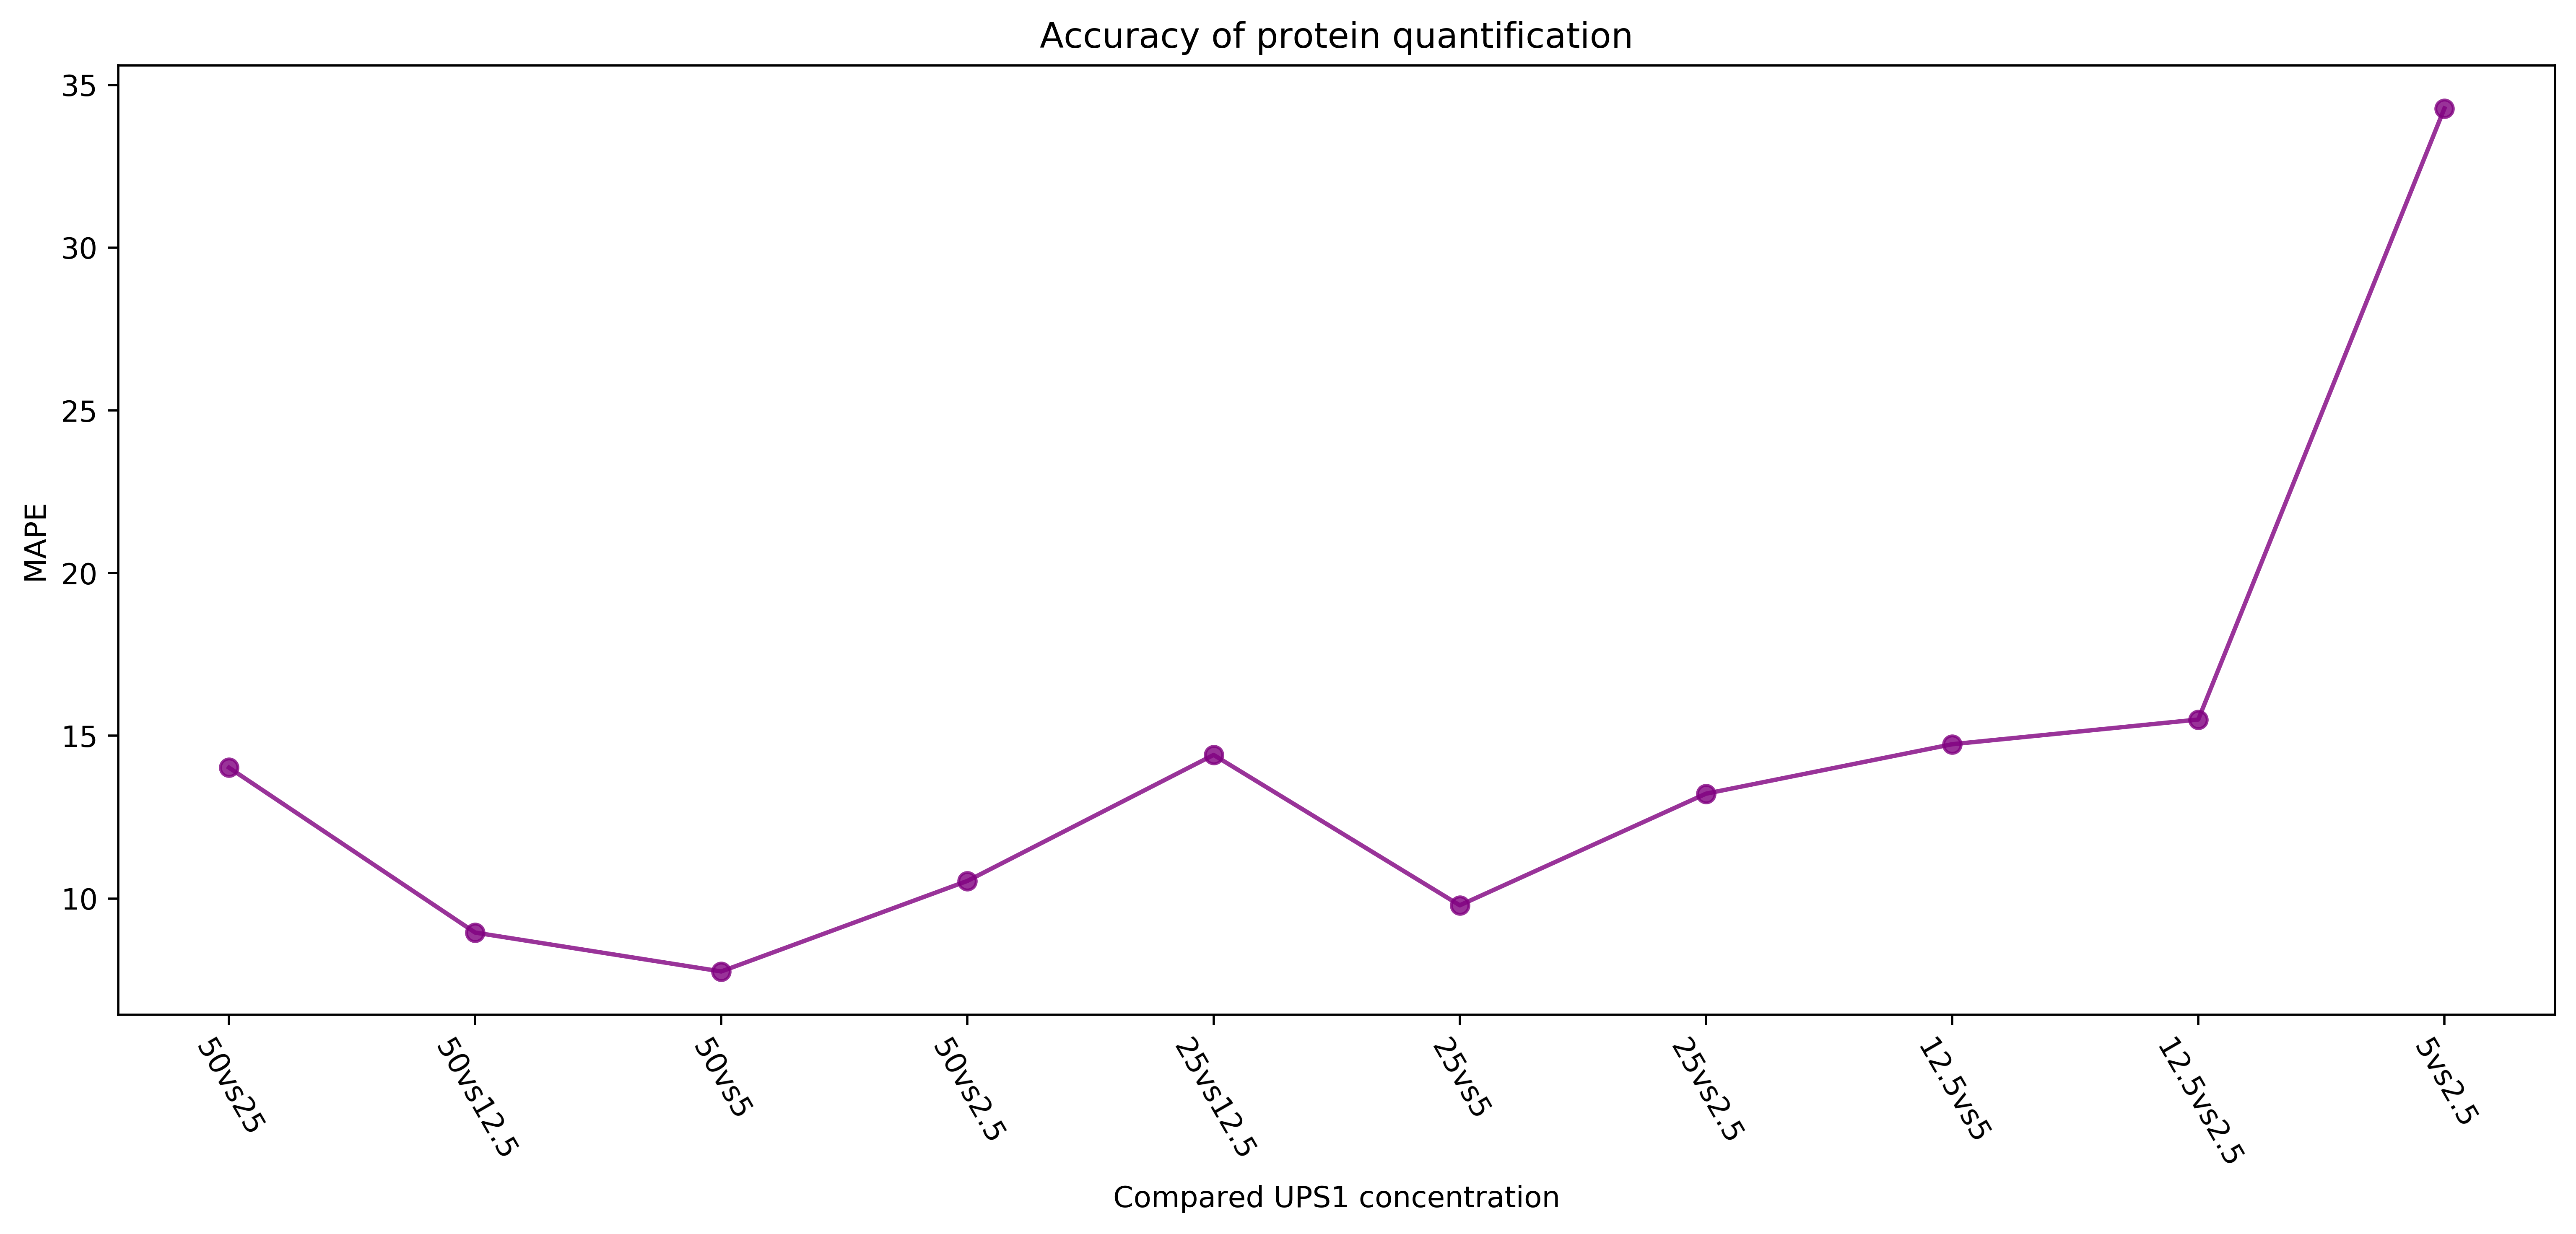

In [61]:
# calculate MAPE
import math

MAPE = []
ups_comp = compar_res[compar_res['Protein'].str.contains("UPS")]
conditions = ["50vs25", "50vs12.5", "50vs5","50vs2.5", 
                          "25vs12.5", "25vs5", "25vs2.5",
                          "12.5vs5", "12.5vs2.5", 
                          "5vs2.5"]
for condition in conditions:
    t = ups_comp[ups_comp['Label'] == condition]
    ape = []
    for protein in t['Protein']:
        if "Missing" in str(t[t['Protein'] == protein]['issue'].values[0]):
            continue
        experimental_log2FC = t[t['Protein'] == protein]['log2FC']
        expected_log2FC = np.log2(float(condition.split("vs")[0]) / float(condition.split("vs")[1]))
        ape.append(np.abs(expected_log2FC - experimental_log2FC) / expected_log2FC * 100)
    MAPE.append(np.mean(ape))

print(MAPE)
plt.figure(figsize=(15,6), dpi=500)
plt.plot(range(10), MAPE, 'ro-', color='purple', alpha=0.8, label='')
plt.xticks(range(10), conditions)
plt.title("Accuracy of protein quantification")
plt.xlabel("Compared UPS1 concentration")
plt.ylabel("MAPE[%]")
plt.xticks(rotation=300)
plt.show()

#### The MSE of the logFC estimates in the all two-group comparison.  For spiked-in proteins, quantms had lower mean MSE of 1.22 than other results from DOI: 10.1093/bib/bbx054.  And the mean MSE of background proteins is also very low.

0.023234531166311467
0.020637854433073068
1.224966320778107
0.26848010975155817


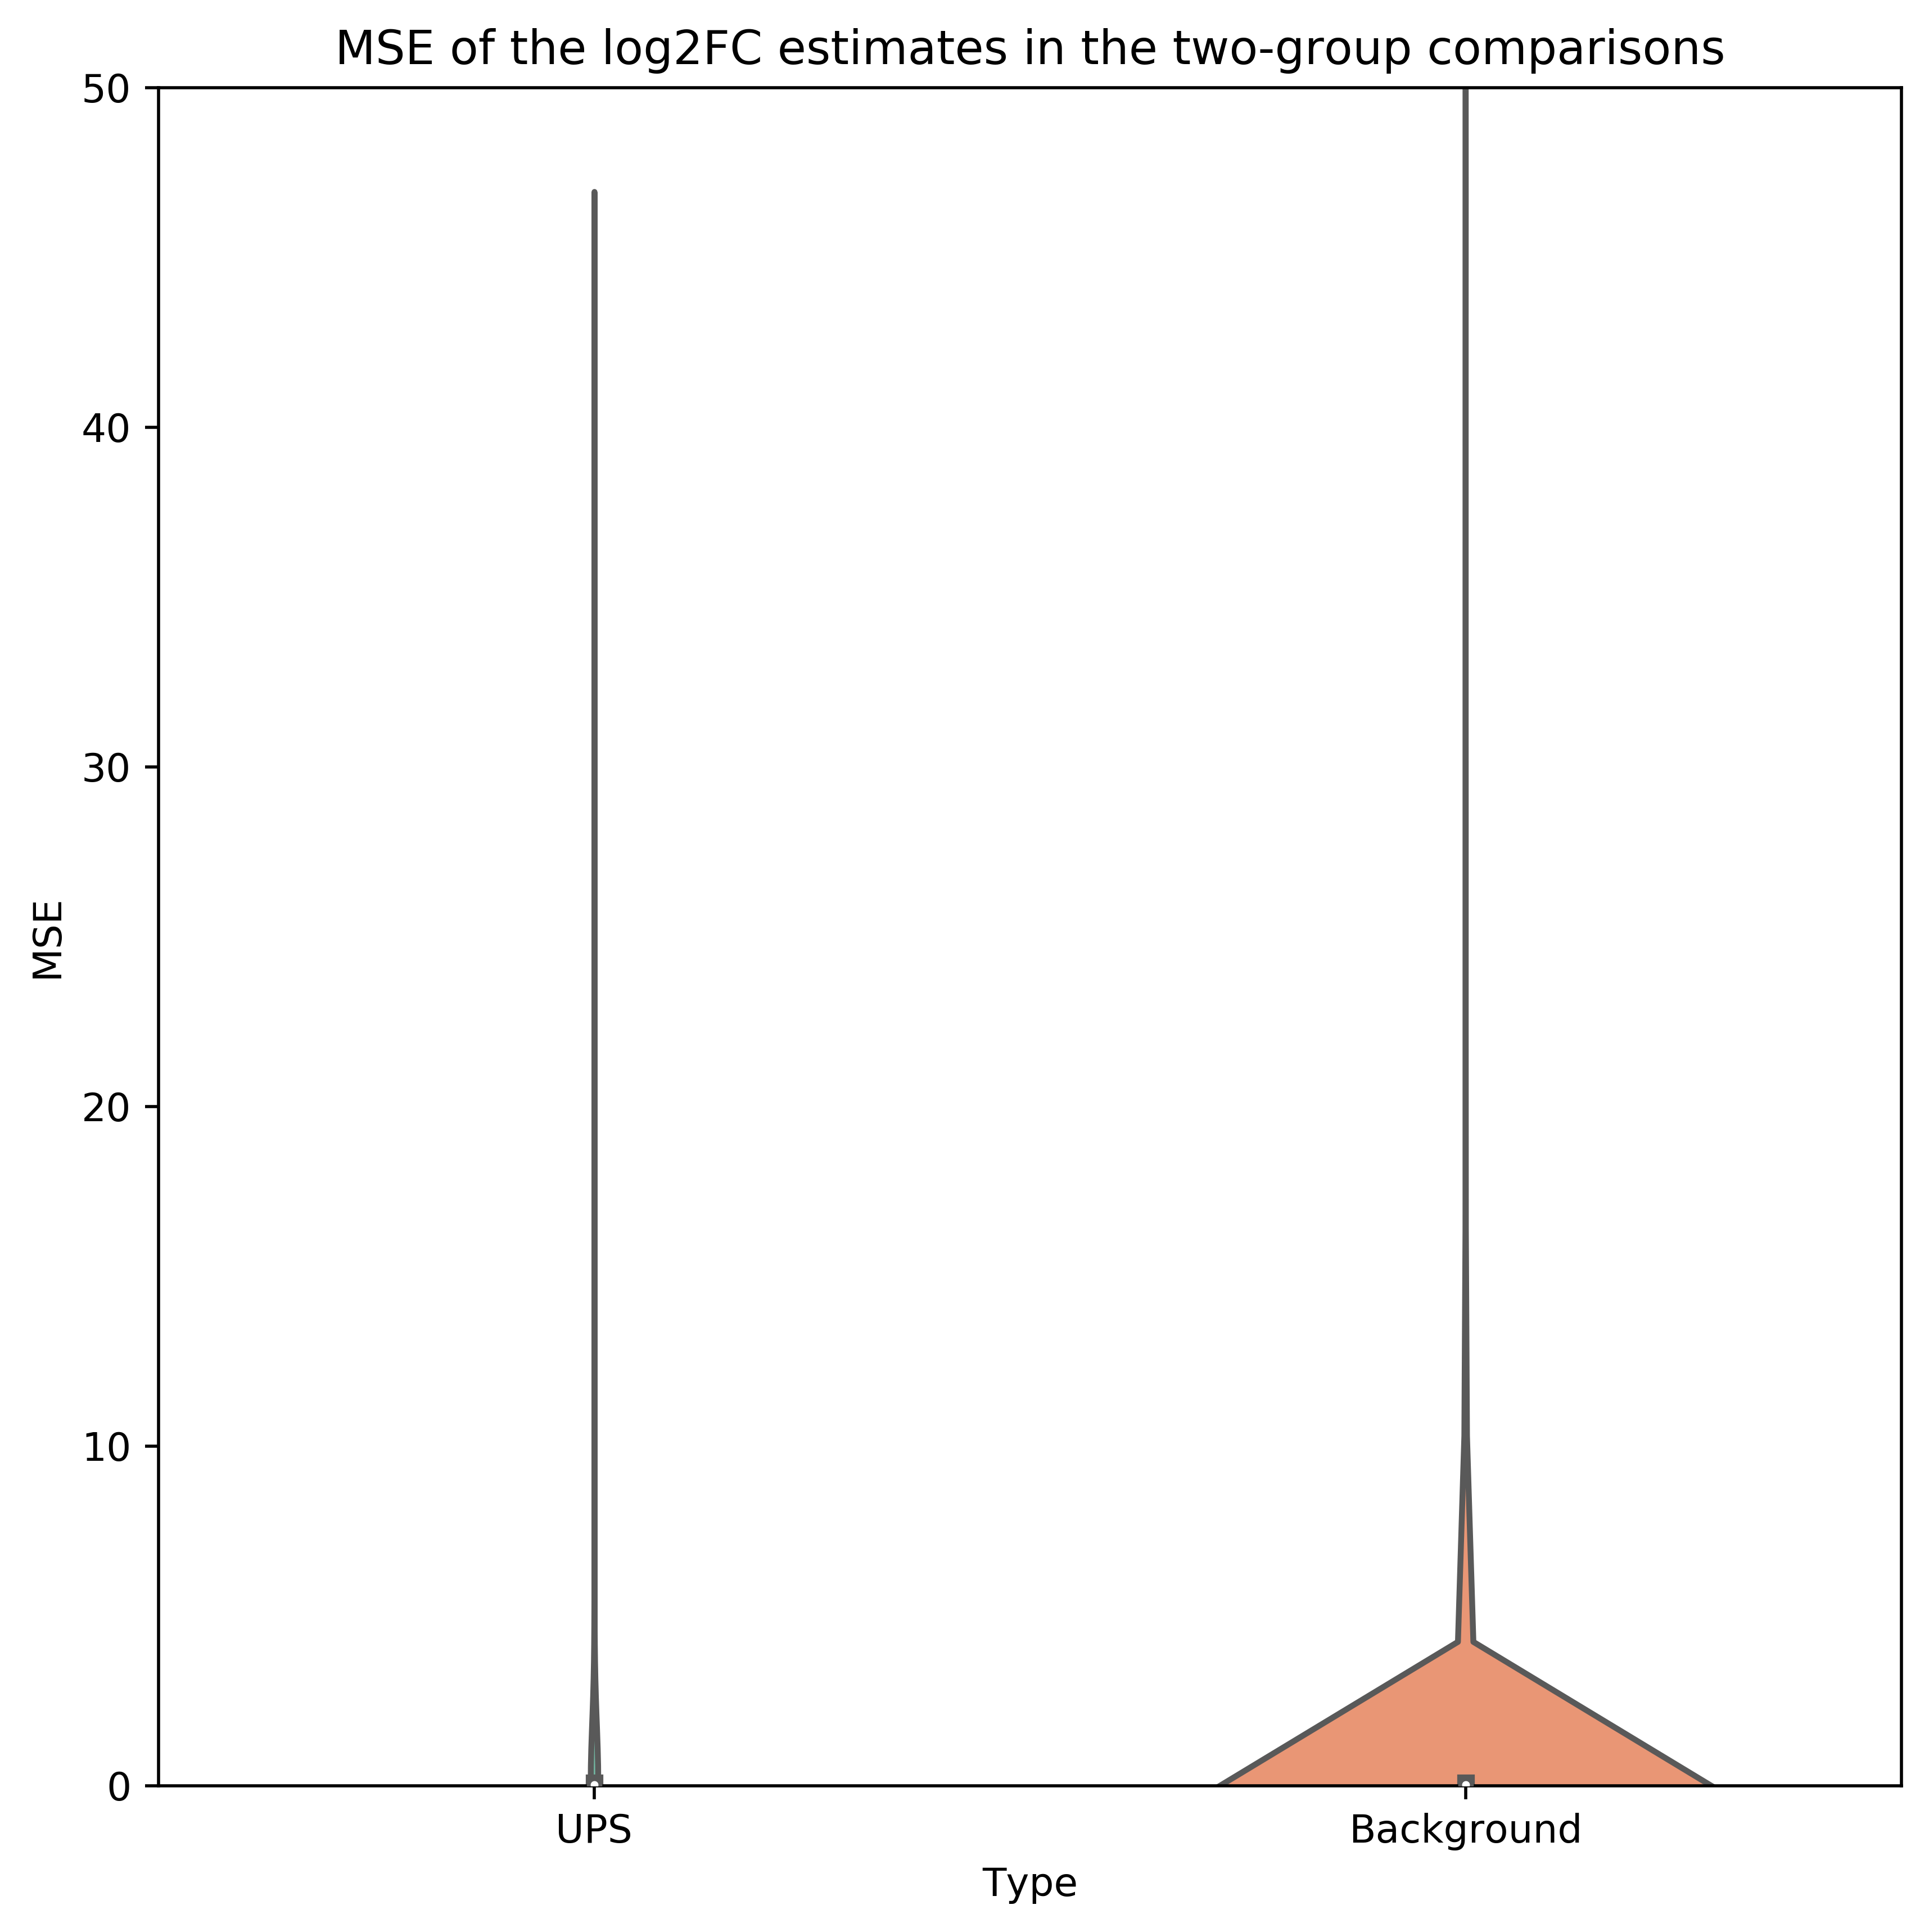

In [62]:
MSEs = pd.DataFrame(columns=["Type", "MSE"])

for _, row in compar_res.iterrows():
    if "Missing" in str(row['issue']):
        continue
    experimental_log2FC = row['log2FC']
    condition = row['Label']
    if "UPS" in row['Protein']:
        datatype = "UPS"
        expected_log2FC = np.log2(float(condition.split("vs")[0]) / float(condition.split("vs")[1]))
    else:
        expected_log2FC = 0
        datatype = "Background"
    mse = (experimental_log2FC - expected_log2FC) ** 2
    MSEs = MSEs.append({'Type': datatype, "MSE": mse}, ignore_index=True)
    
plt.figure(figsize=(8,8), dpi=500)
plt.ylim(0, 50)
plt.title("MSE of the log2FC estimates in the two-group comparisons")
sns.violinplot(x = "Type", y="MSE", data=MSEs, scale= "count", palette="Set2")
print(np.median(MSEs[MSEs['Type'] == "UPS"]['MSE']))
print(np.median(MSEs[MSEs['Type'] != "UPS"]['MSE']))
print(np.mean(MSEs[MSEs['Type'] == "UPS"]['MSE']))
print(np.mean(MSEs[MSEs['Type'] != "UPS"]['MSE']))
plt.show()

### Measure Sensitivity and specificity of the differential expression analysis

#### Proteins are typically chosen for follow-up experiment and validation based on the significance of their p-values or adj-pvalue/ q-value, especially for differential protein analysis. Thus, calculated the ROC curves based on adj-pvalue generated in the msstats.

#### Sensitivity (%) = 100 * TP / (TP+FN) and FDP (%) = 100 * FP / (FP+TP)；Specifity = TNR = TN / (TN + FN)

In [63]:
# filtered out missing value
compar_res = pd.read_csv("comparison_res.csv", sep=',', header=0)
compar_res = compar_res.query('(issue != issue) & (pvalue == pvalue)')
compar_res

Protein        Label    log2FC        SE     Tvalue  \
0      O00762ups|UBE2C_HUMAN_UPS       50vs25  0.879154  0.064578  13.613915   
1      O00762ups|UBE2C_HUMAN_UPS     50vs12.5  1.794817  0.064578  27.793181   
2      O00762ups|UBE2C_HUMAN_UPS        50vs5  3.099735  0.064578  48.000165   
3      O00762ups|UBE2C_HUMAN_UPS      50vs2.5  4.051641  0.072200  56.116955   
8      O00762ups|UBE2C_HUMAN_UPS     25vs12.5  0.915663  0.064578  14.179266   
...                          ...          ...       ...       ...        ...   
38440       sp|Q99383|HRP1_YEAST   2.5vs0.125 -0.464587  0.095881  -4.845453   
38441       sp|Q99383|HRP1_YEAST    2.5vs0.05 -0.142064  0.095881  -1.481667   
38445       sp|Q99383|HRP1_YEAST  0.25vs0.125 -0.163949  0.107198  -1.529398   
38446       sp|Q99383|HRP1_YEAST   0.25vs0.05  0.158574  0.107198   1.479262   
38447       sp|Q99383|HRP1_YEAST  0.125vs0.05  0.322523  0.095881   3.363785   

         DF        pvalue    adj.pvalue issue  MissingPercentage  \
0       9.0  2.610662e-07  1.206517e-05   NaN           0.166667   
1       9.0  4.907321e-10  4.146686e-08   NaN           0.348485   
2       9.0  3.704592e-12  4.021675e-10   NaN           0.393939   
3       9.0  9.119372e-13  9.107973e-11   NaN           0.454545   
8       9.0  1.837216e-07  1.942888e-05   NaN           0.515152   
...     ...           ...           ...   ...                ...   
38440  11.0  5.144880e-04  4.653466e-03   NaN           0.000000   
38441  11.0  1.664979e-01  2.793313e-01   NaN           0.000000   
38445  11.0  1.543995e-01  6.968670e-01   NaN           0.166667   
38446  11.0  1.671285e-01  3.974050e-01   NaN           0.166667   
38447  11.0  6.321387e-03  7.666939e-02   NaN           0.000000   

       ImputationPercentage  
0                  0.166667  
1                  0.348485  
2                  0.393939  
3                  0.287879  
8                  0.515152  
...                     ...  
38440              0.000000  
38441              0.000000  
38445              0.000000  
38446              0.000000  
38447              0.000000  

[29862 rows x 11 columns]

####  ROC curve: AUC is 0.95, that is better than other results MaxQuant(0.666), OpenMS(0.737), Peaks(0.724), Progenesis(0.861), Proteios(0.726) from DOI: 10.1093/bib/bbx054.

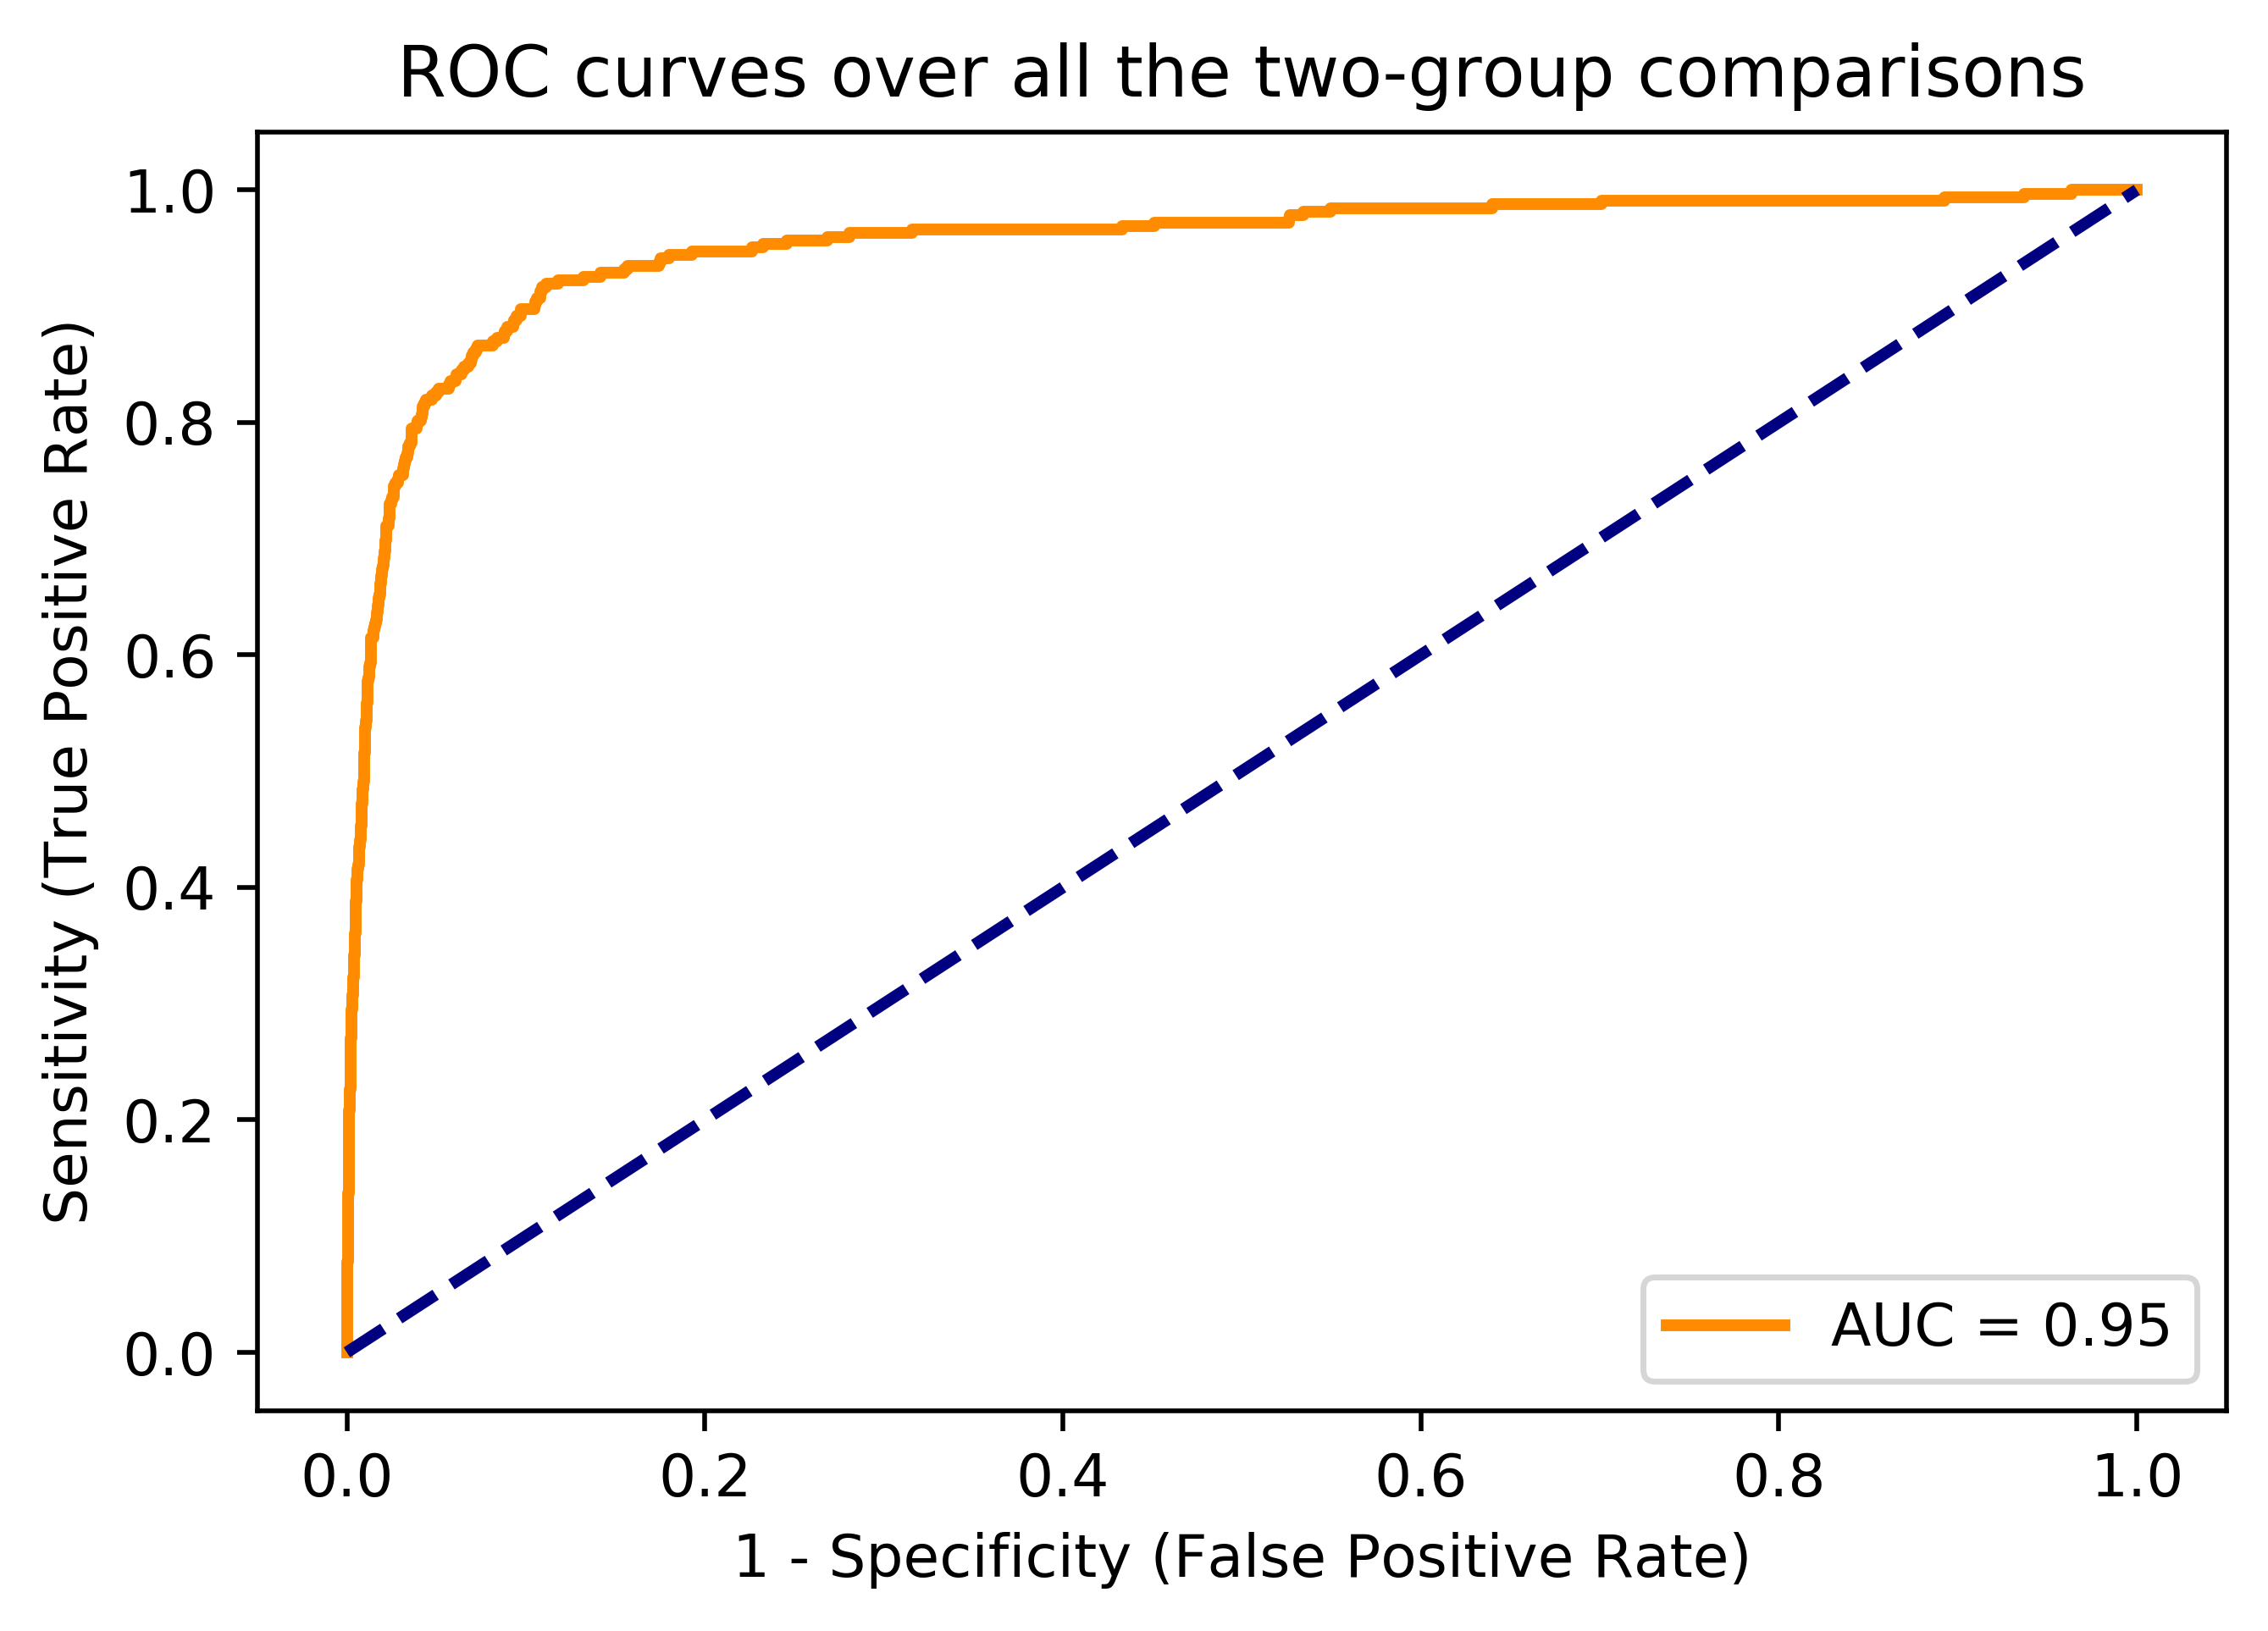

In [65]:
from sklearn import metrics

compar_res['value'] = 1 - compar_res['pvalue']
compar_res['y'] = compar_res['Protein'].map(lambda x: ("UPS" in x and 1) or ("UPS" not in x and 0))

compar_res = compar_res.sort_values(by="value", ascending=False)
compar_res.head()

fpr, tpr, thresholds = metrics.roc_curve(compar_res['y'].tolist(), compar_res['value'].tolist(), pos_label = 1)
auc = metrics.auc(fpr, tpr)

plt.figure(dpi=500)

plt.plot(fpr, tpr, color="darkorange", lw=2, label="AUC = %0.2f" % auc)
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.title("ROC curves over all the two-group comparisons")
plt.xlabel("1 - Specificity (False Positive Rate)")
plt.ylabel("Sensitivity (True Positive Rate)")
plt.legend(loc="lower right")


#### pAUCs within each comparison. Calculating the total AUC seems arbitrary, because pvalue distribution may be difference between comparisons. And the differential expression proteins were detected in difference comparisons. Thus, pAUC metric is calculated. 

#### quantms has a higher pAUC distribution than DOI: 10.1093/bib/bbx054. Are all above 96%

Text(0.5, 1.0, 'pAUCs of each two-group comparison')

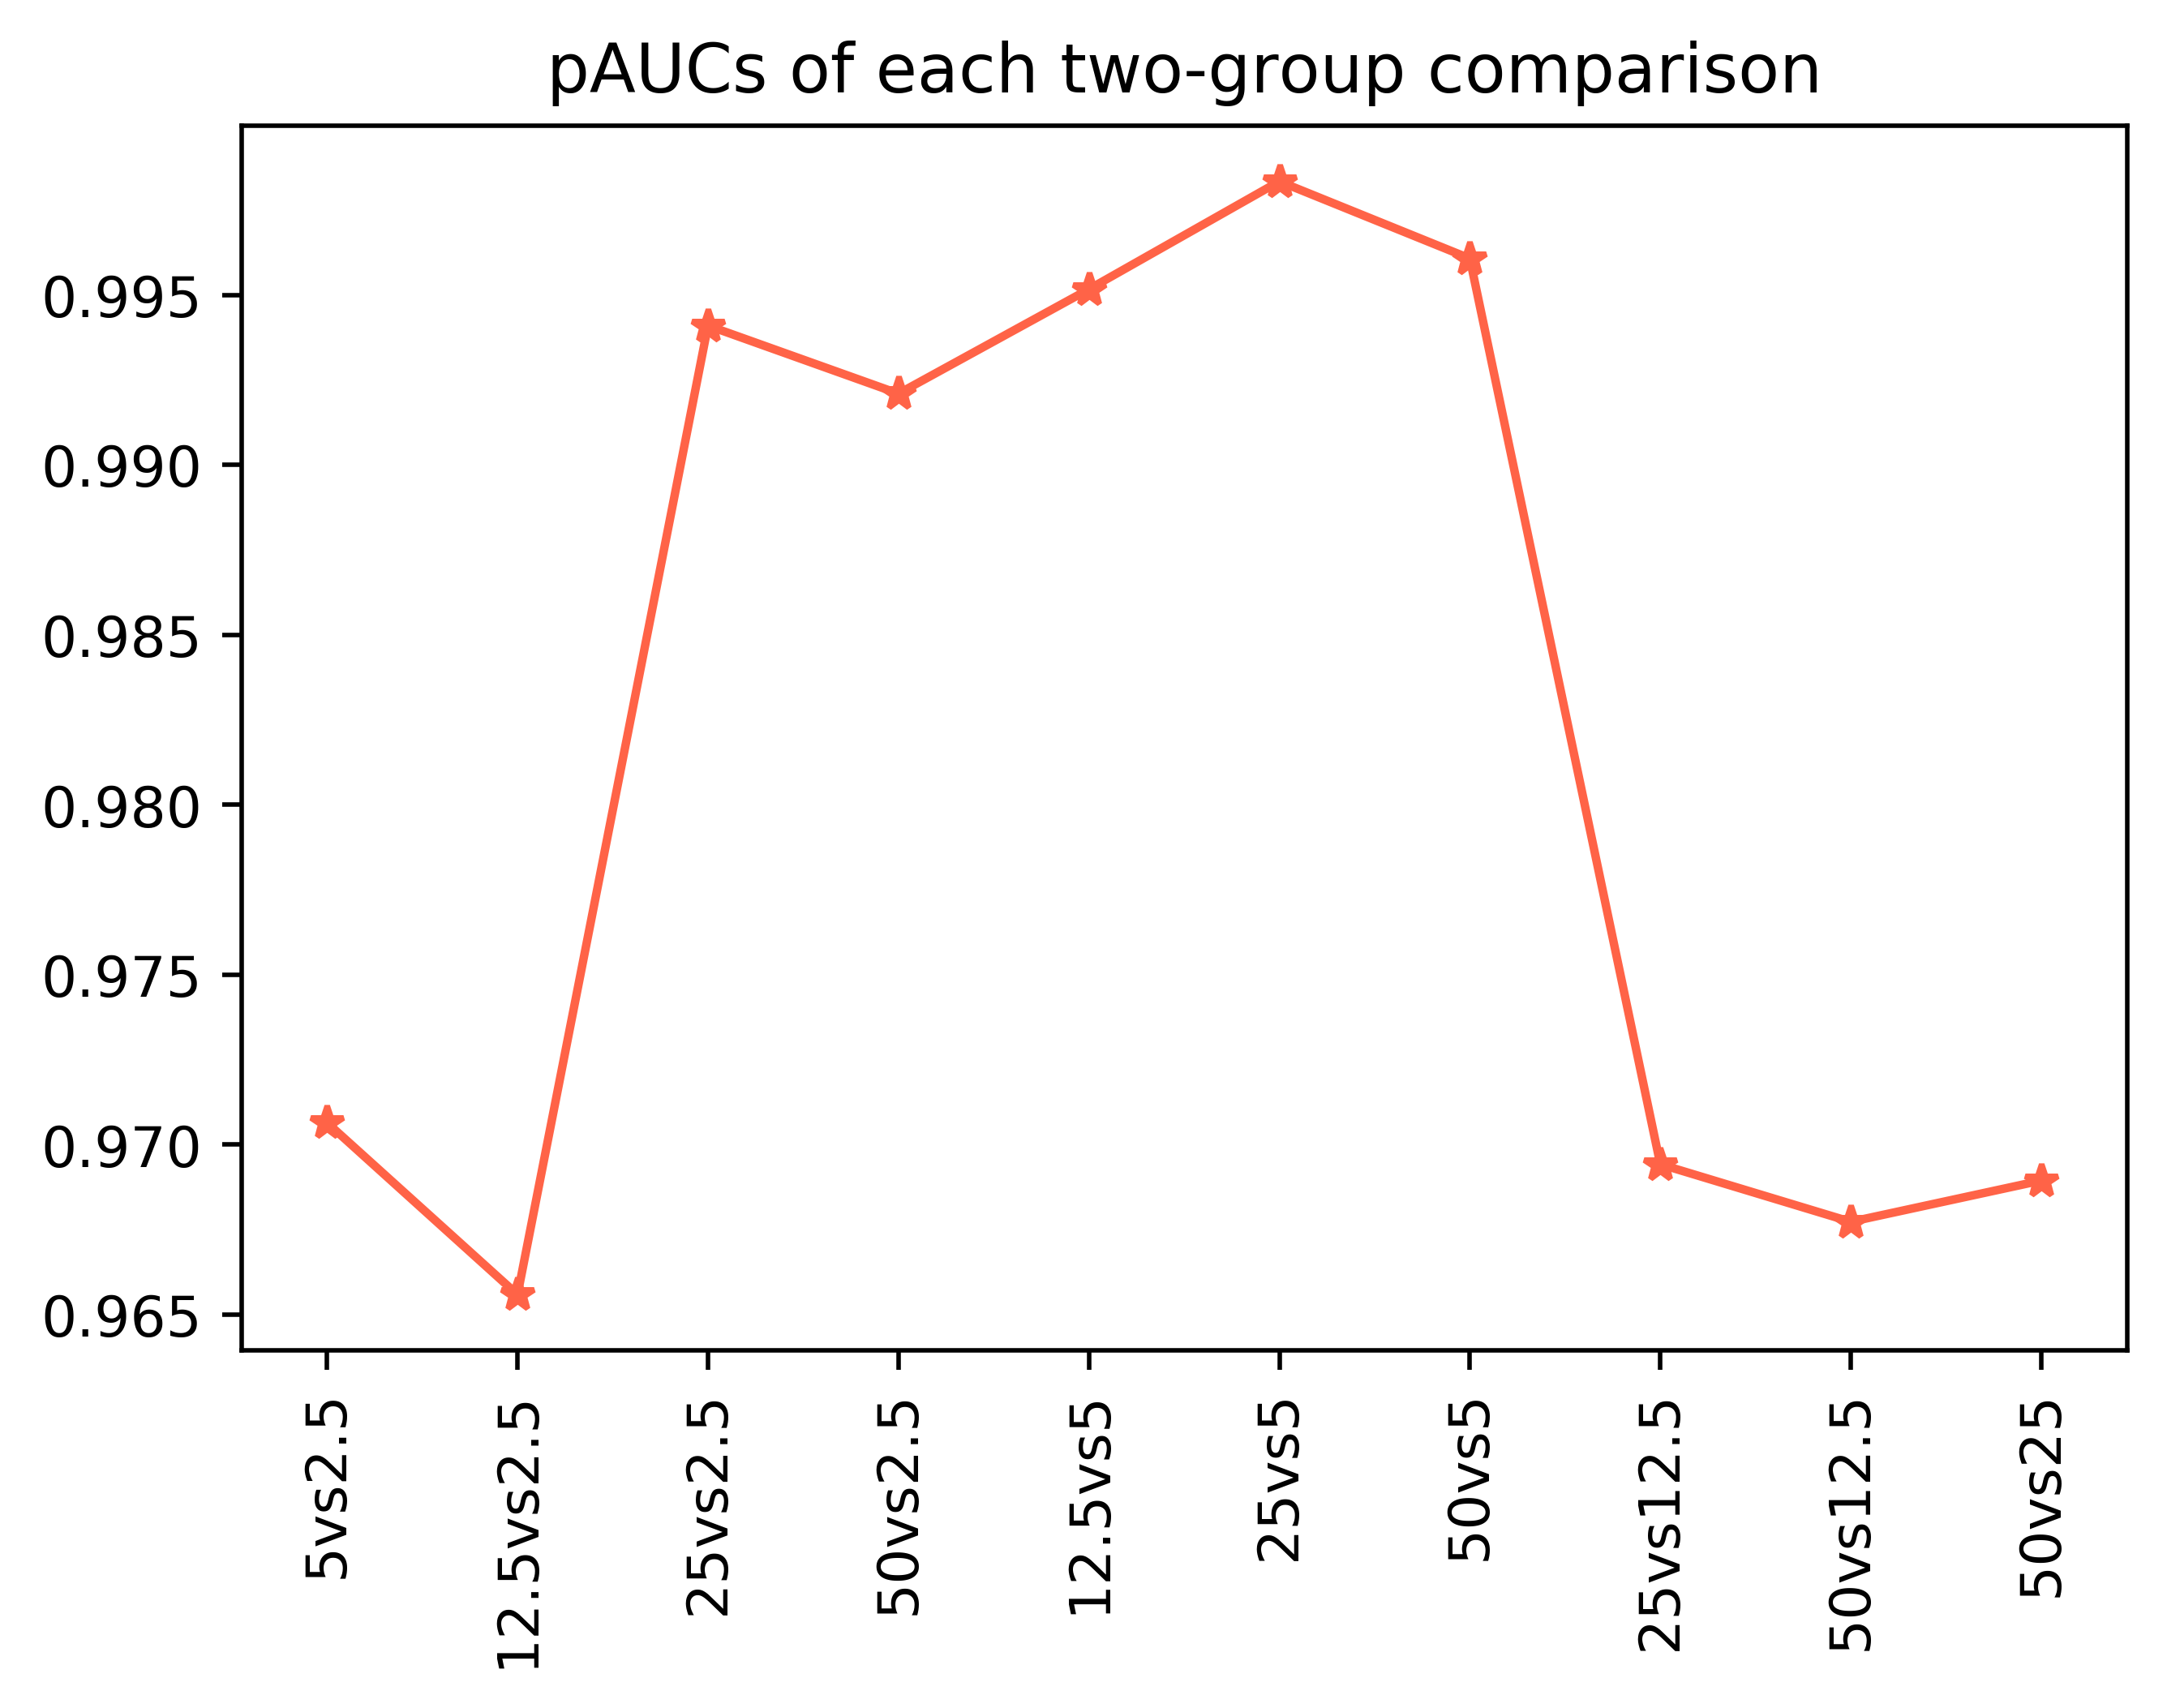

In [67]:
compar_res.head()

conditions = ["5vs2.5", "12.5vs2.5", "25vs2.5","50vs2.5", "12.5vs5", "25vs5", "50vs5","25vs12.5", "50vs12.5", "50vs25"]
paucs = []
for condition in conditions:
    comp_condition = compar_res[compar_res['Label'] == condition]
    fpr, tpr, thresholds = metrics.roc_curve(comp_condition['y'].tolist(), comp_condition['value'].tolist(), pos_label = 1)
    pauc = metrics.auc(fpr, tpr)
    paucs.append(pauc)

plt.figure(dpi=500)
plt.plot(range(len(conditions)), paucs, 'r*-', color='tomato')
plt.xticks(range(len(conditions)), conditions)
plt.xticks(rotation=90)

plt.title("pAUCs of each two-group comparison")


#### Ignore the following analysis for now

In [20]:
from sklearn import metrics
# calculate z-score: (FC-FC average) / FC std
FC_Average = np.mean(compar_res['log2FC'])
FC_Std = np.std(compar_res['log2FC'])

compar_res['Z-Score'] = compar_res.apply(lambda x: (x['log2FC'] - FC_Average) / FC_Std, axis=1)

conditions = ["50vs25", "50vs12.5", "50vs5","50vs2.5","25vs12.5", "25vs5", "25vs2.5","12.5vs5", "12.5vs2.5","5vs2.5"]
# conditions = ["50vs25", "50vs12.5", "50vs5","50vs2.5","50vs0.5", "50vs0.25", "50vs0.125","50vs0.05", 
#                           "25vs12.5", "25vs5", "25vs2.5", "25vs0.5", "25vs0.25", "25vs0.125", "25vs0.05",
#                           "12.5vs5", "12.5vs2.5", "12.5vs0.5", "12.5vs0.25", "12.5vs0.125", "12.5vs0.05",
#                           "5vs2.5", "5vs0.5", "5vs0.25", "5vs0.125", "5vs0.05",
#                           "2.5vs0.5", "2.5vs0.25", "2.5vs0.125", "2.5vs0.05",
#                           "0.5vs0.25", "0.5vs0.125", "0.5vs0.05",
#                           "0.25vs0.125", "0.25vs0.05",
#                            "0.125vs0.05"]
data = pd.DataFrame(columns=['value', 'metrics', 'label', 'value2'])
for condition in conditions:
    group = compar_res[compar_res['Label'] == condition]
    differential_proteins = group[(group['adj.pvalue'] < 0.05) & (np.abs(group['Z-Score']) > 1.96)]
    FN = len(group[((group['adj.pvalue'] >= 0.05) | (np.abs(group['Z-Score']) <= 1.96 )) & (group['Protein'].str.contains("ups"))])
    TP = len(differential_proteins[differential_proteins['Protein'].str.contains("ups")]['Protein'])
    FP = len(differential_proteins[-differential_proteins['Protein'].str.contains("ups")]['Protein'])
    
    if TP + FP == 0:
        data = data.append({"value": 0, "metrics": "Sensitivity", "Label": condition, 'value2': 0}, ignore_index=True)
        data = data.append({"value": 0, "metrics": "FDP", "Label": condition, 'value2': 0}, ignore_index=True)
        continue
    Sensitivity = TP / (TP+FN) * 100
    FDP = FP / (FP + TP) * 100
    data = data.append({"value": Sensitivity, "metrics": "Sensitivity", "Label": condition, 'value2': Sensitivity}, ignore_index=True)
    data = data.append({"value": FDP, "metrics": "FDP", "Label": condition, 'value2': -FDP},ignore_index=True)
    
data.to_csv("./test1.csv", sep=',', index=False)

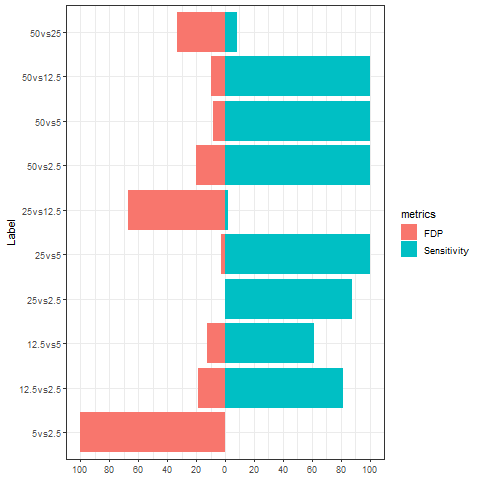

In [21]:
%%R 

library(ggplot2)
data = read.csv("test1.csv", sep=',',header = TRUE)
# conditions = c("50vs25", "50vs12.5", "50vs5","50vs2.5","50vs0.5", "50vs0.25", "50vs0.125","50vs0.05", 
#                           "25vs12.5", "25vs5", "25vs2.5", "25vs0.5", "25vs0.25", "25vs0.125", "25vs0.05",
#                           "12.5vs5", "12.5vs2.5", "12.5vs0.5", "12.5vs0.25", "12.5vs0.125", "12.5vs0.05",
#                           "5vs2.5", "5vs0.5", "5vs0.25", "5vs0.125", "5vs0.05",
#                           "2.5vs0.5", "2.5vs0.25", "2.5vs0.125", "2.5vs0.05",
#                           "0.5vs0.25", "0.5vs0.125", "0.5vs0.05",
#                           "0.25vs0.125", "0.25vs0.05",
#                            "0.125vs0.05")
conditions = c("50vs25", "50vs12.5", "50vs5","50vs2.5","25vs12.5", "25vs5", "25vs2.5","12.5vs5", "12.5vs2.5","5vs2.5")

conditions = rev(conditions)
data$Label <- factor(data$Label,levels=conditions)

ggplot(data = data) + geom_col(aes(x = Label, y = value2, fill = metrics)) + 
   scale_y_continuous(breaks = seq(from = -100, to = 100,by = 20),labels = c(seq(100, 0, -20), seq(20, 100, 20))) + 
   coord_flip() + theme_bw() + ylab(NULL)

# ggsave("sensitivity.png", dpi = 500)